# House Price Prediction Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem by building a regression model using regularization for the prediction of house prices.
* Comprehend the given data set and perform Exploratory Data Analysis (EDA) to analyse the data set.
* Build a regression model to identify the best fit variables that can predict the house prices.

### Project Description

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. They have contracted a consulting company to understand the factors on which the house prices depends and decide whether to invest in them or not.
The company wants to know:
* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

#### Data Set Brief Information
The data set contains information about the sale prices and properties of the house.
A data dictionary is provided along with the data set to understand various terms and variables used.

#### Business Objective
Analyse and Perform Exploratory Data Analysis (EDA) on the given data set. Build a regression model using regularization for the prediction of house prices.
Determine the optimal value of lambda for ridge and lasso regression.

#### Business Solution
Present the model, which can predict the house prices. Surprise Housing management will use this model to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 4)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Import date time
import datetime
# Import train_test_split to split data to random train and test subsets
from sklearn.model_selection import train_test_split
# Import min-max scalar for scaling data
from sklearn.preprocessing import StandardScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Importing Grid Search
from sklearn.model_selection import GridSearchCV
# Import library to calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statistical model library
import statsmodels.api as sm
# Calculate R-squared value and Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Read the dataset
hpp_df = pd.read_csv('train.csv')

In [3]:
# Check the shape of the dataframe
print('The given data set have {0} rows and {1} columns.\nLet\'s see first 5 values of data set.'.format(hpp_df.shape[0],hpp_df.shape[1]))

The given data set have 1460 rows and 81 columns.
Let's see first 5 values of data set.


In [4]:
# Check the first five rows
hpp_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

**Get the concise summary of data set and data type of each column**

In [5]:
# Check the dataframe info
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence imputation might be required.

3) Some features have different data types than expected one.

4) Year column is present for analysing whether the house was remodeled or not.

5) Sales details are available - Year and Month

### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [6]:
# Check if there is any duplicated entries in rows
hpp_df[hpp_df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

**Observation** : There are no such rows that have duplicated entries.

#### Data Analysis

With the help of data dictionary, let's analyse each values filled in columns and understand their respective meaning.

**Observations**

1) Column 'Id' is not required as it is an index variable.

2) Lot of featues have '**NA**' in their categorical level, which can cause error of '**Missing Values**'.

3) Some integer variables are actually categorical in nature.


#### Data Filtering

In [7]:
# Remove Id column as it is not required
hpp_df.drop(labels = 'Id', axis = 1, inplace = True)

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [8]:
# Check the number of columns having null values across entire index range
hpp_df.isnull().all().sum()

0

In [9]:
# Check the number of rows having null values across entire column range
hpp_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

#### Data Imputation and Standardization

Correct data type, fill and impute right values

In [10]:
# Display all columns having at least one null value present in its rows
hpp_df.columns[hpp_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

**'NA' in some features doesn't mean NaN, actually it indicates its corresponding categorical level**

In [11]:
# Replace 'NA' in features which actually indicates categorical level

# NA in Alley column means No Alley
hpp_df['Alley'].fillna('No Alley', inplace=True)

# NA in following columns means No Basement
list_of_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in list_of_columns:
    hpp_df[col].fillna('No Basement', inplace=True)

# NA in FireplaceQu column means No Fireplace
hpp_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

# NA in following columns means No Garage
list_of_columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in list_of_columns:
    hpp_df[col].fillna('No Garage', inplace=True)

# NA in PoolQC column means No Pool
hpp_df['PoolQC'].fillna('No Pool', inplace=True)

# NA in Fence column means No Fence
hpp_df['Fence'].fillna('No Fence', inplace=True)

# NA in MiscFeature column means No Additional Features
hpp_df['MiscFeature'].fillna('No Additional Features', inplace=True)

**Some features datatype indicates numeric data type but actually they are categorical features - ordered and unordered**

In [12]:
# Convert variables to category data type
list_of_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

hpp_df[list_of_columns] = hpp_df[list_of_columns].astype('category')

**Once more, let's check the features having NULL values**

In [13]:
# Display again all columns having at least one null value present in its rows
hpp_df.columns[hpp_df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

**Get the count and percentage of NULL values in each of the above features**

In [14]:
# Display count of total missing values in columns with NULL value
list_of_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MasVnrType', 'Electrical']
hpp_df[list_of_columns].isnull().sum()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [15]:
# Display the percentage of missing data
percent_missing = (hpp_df.isnull().sum() * 100 / len(hpp_df)).sort_values(ascending = False)
percent_missing = percent_missing[percent_missing > 0]
print(percent_missing)

LotFrontage    17.7397
GarageYrBlt     5.5479
MasVnrArea      0.5479
MasVnrType      0.5479
Electrical      0.0685
dtype: float64


**Let's impute these features by closing observing related dependent features and identify any pattern to predict and fill values**

In [16]:
# MasVnrType and MasVnrArea are related features. Since both have missing count as 8, let's check if they are same 
# row enteries or not.
hpp_df[hpp_df.MasVnrType.isnull() & hpp_df.MasVnrArea.isnull()].shape[0]

8

**Observation** : Both MasVnrType and MasVnrArea have 8 missing values and from above expression, it is clear that the **NaN** rows comes together. Hence it is better to fill MasVnrType as '**None**' and MasVnrArea as **0**

In [17]:
# Impute NA in MasVnrType column as None
hpp_df['MasVnrType'].fillna('None', inplace=True)

# Impute NA in MasVnrArea column as 0
hpp_df['MasVnrArea'].fillna(0, inplace=True)

In [18]:
# Get the count of different categorical types of feature GarageType
hpp_df.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [19]:
# GarageType and GarageYrBlt are related features. Since GarageType = 'No Garage' count is 81, let's check if 
# GarageYrBlt = NA belong to same row entery or not.
hpp_df[hpp_df.GarageYrBlt.isnull() & (hpp_df.GarageType == 'No Garage')].shape[0]

81

**Observation** : From above expression, it is clear that the GarageYrBlt = **NA** rows have GarageType = '**No Garage**'. Hence it is better to fill GarageYrBlt as 0

In [20]:
# Impute NA in GarageYrBlt column as 0
hpp_df['GarageYrBlt'].fillna(0, inplace=True)

In [21]:
# Get the count of different categorical types of feature Electrical
hpp_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
# Get the row entry where feature Electrical is NA
hpp_df[hpp_df.Electrical.isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
1379         80       RL         73.0     9735   Pave  No Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl           5           5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath  \
1379       754       640             0       1394            0            0   

     FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd  \
1379        2        1            3            1          Gd            7   

     Functional Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  \
1379        Typ          0  No Fireplace    BuiltIn       2007.0          Fin   

     GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
1379          2         400         TA         TA          Y         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC  \
1379            0              0          0            0         0  No Pool   

         Fence             MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379  No Fence  No Additional Features        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

**Observation** : Since Utilities = 'AllPub' in above table, we can say that feature Electrical can be assumed as most occuring categorical level.

In [23]:
# Impute NA in Electrical column as most occuring categorical level
hpp_df['Electrical'].fillna(hpp_df.Electrical.mode()[0], inplace=True)

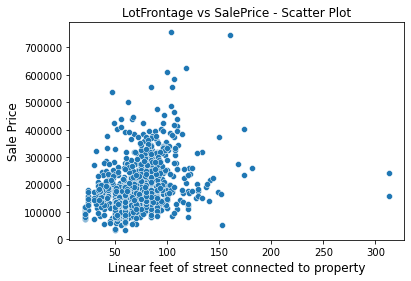

In [24]:
# Scatter Plot of column LotFrontage
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = hpp_df)
plt.xlabel('Linear feet of street connected to property', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('LotFrontage vs SalePrice - Scatter Plot')
plt.show()

**Observation** : We can see LotFrontage have some relation with SalePrice, eventhough the spread is less as price increases. Hence mostly it won't help in predicting SalePrice.
Thus imputing LotFrontage with either median or predicting its value using linear regression with some independent variable is not required.
In conclusion, we can will fill missing values as zero.

In [25]:
# Impute NA in LotFrontage column as 0
hpp_df['LotFrontage'].fillna(0, inplace=True)

In [26]:
# Convert following columns to integer type
list_of_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
hpp_df[list_of_columns] = hpp_df[list_of_columns].astype('int64')

#### Deriving new columns

**Year built, Year in which remodelling was done and year and month in which the house was sold is given. Let's find the age of the house at the time of sell and save it as new feature**

In [27]:
# Calculate age of house when it was sold. Since houses was remodeled, age of house = year sold - year remodeled
# In case houses were remodelled after it was sold off, age of house = year sold - year built
hpp_df['Property Age'] = np.where(hpp_df['YrSold'] >= hpp_df['YearRemodAdd'], hpp_df['YrSold'] - hpp_df['YearRemodAdd'], hpp_df['YrSold'] - hpp_df['YearBuilt'])

# Remove following columns as it is not required anymore. Note we are ignoring month at which house was sold, since it 
# will not have any value in calculating age of property
list_of_columns = ['YearBuilt', 'YrSold', 'YearRemodAdd', 'MoSold']
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

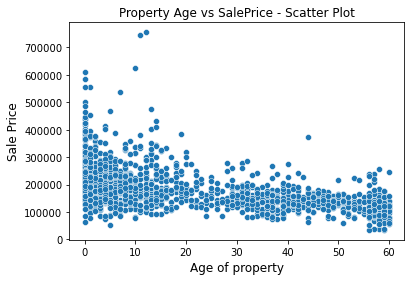

In [28]:
# Scatter Plot of column Property Age
sns.scatterplot(x = 'Property Age', y = 'SalePrice', data = hpp_df)
plt.xlabel('Age of property', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Property Age vs SalePrice - Scatter Plot')
plt.show()

**Observation** : 'Property Age' is negatively correlated with 'SalePrice'. We can see the spread going down with increase in 'SalePrice'.

Let's see percentile and statistical nature of 'Property Age'

In [29]:
# Description of the 'Property Age' column
hpp_df['Property Age'].describe()

count    1460.0000
mean       22.9507
std        20.6399
min         0.0000
25%         4.0000
50%        14.0000
75%        41.0000
max        60.0000
Name: Property Age, dtype: float64

**Observation** : Age of house varies from 10 years to 60 years when it was sold.

Let's divide this age to different buckets and further analyze it.

In [30]:
# 'Property Age' column can be divided 6 buckets
hpp_df['Age Bucket'] = pd.cut(hpp_df['Property Age'], 
                                    np.arange(0, 61, 10), # bins : min is 0 and max is 60
                                    labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'], # bucket labels
                                    include_lowest = True)

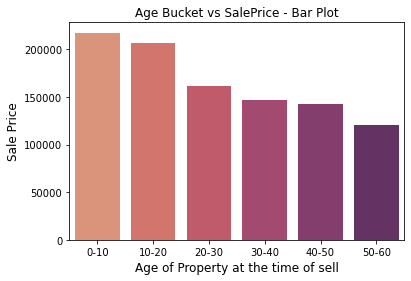

In [31]:
# Bar Plot of column Age Bucket with SalePrice
sns.barplot(x = 'Age Bucket', y = 'SalePrice', data = hpp_df, ci = None, palette = "flare")
plt.xlabel('Age of Property at the time of sell', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Age Bucket vs SalePrice - Bar Plot')
plt.show()

**Observation** : Seems SalePrice is more if the property age value is within 10 years. And also we can see a gradual decline in SalePrice as age of property increases. Hence this means, 'Property Age' would be negatively correlated with SalePrice.

In [32]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(hpp_df.shape[0], hpp_df.shape[1]))

The data set now have 1460 rows and 78 columns


In [33]:
# Check the dataframe info
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   int64   
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

**We have imputed values, derived new feature and corrected data types of features**

In [34]:
# Check the percentile and min-max of numerical variables.
hpp_df.describe(percentiles=[.1, .25, .5, .75, .90, .95, .99])

LotFrontage      LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count    1460.0000    1460.0000   1460.0000   1460.0000   1460.0000   
mean       57.6233   10516.8281    103.1171    443.6397     46.5493   
std        34.6643    9981.2649    180.7314    456.0981    161.3193   
min         0.0000    1300.0000      0.0000      0.0000      0.0000   
10%         0.0000    5000.0000      0.0000      0.0000      0.0000   
25%        42.0000    7553.5000      0.0000      0.0000      0.0000   
50%        63.0000    9478.5000      0.0000    383.5000      0.0000   
75%        79.0000   11601.5000    164.2500    712.2500      0.0000   
90%        92.0000   14381.7000    335.0000   1065.5000    117.2000   
95%       104.0000   17401.1500    456.0000   1274.0000    396.2000   
99%       137.4100   37567.6400    791.2800   1572.4100    830.3800   
max       313.0000  215245.0000   1600.0000   5644.0000   1474.0000   

       BsmtUnfSF  TotalBsmtSF   1stFlrSF   2ndFlrSF  LowQualFinSF  GrLivArea  \
count  1460.0000    1460.0000  1460.0000  1460.0000     1460.0000  1460.0000   
mean    567.2404    1057.4295  1162.6267   346.9925        5.8445  1515.4637   
std     441.8670     438.7053   386.5877   436.5284       48.6231   525.4804   
min       0.0000       0.0000   334.0000     0.0000        0.0000   334.0000   
10%      74.9000     636.9000   756.9000     0.0000        0.0000   912.0000   
25%     223.0000     795.7500   882.0000     0.0000        0.0000  1129.5000   
50%     477.5000     991.5000  1087.0000     0.0000        0.0000  1464.0000   
75%     808.0000    1298.2500  1391.2500   728.0000        0.0000  1776.7500   
90%    1232.0000    1602.2000  1680.0000   954.2000        0.0000  2158.3000   
95%    1468.0000    1753.0000  1831.2500  1141.0500        0.0000  2466.1000   
99%    1797.0500    2155.0500  2219.4600  1418.9200      360.0000  3123.4800   
max    2336.0000    6110.0000  4692.0000  2065.0000      572.0000  5642.0000   

       GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    1460.0000   1460.0000   1460.0000    1460.0000      1460.0000   
mean     1868.7397    472.9801     94.2445      46.6603        21.9541   
std       453.6973    213.8048    125.3388      66.2560        61.1191   
min         0.0000      0.0000      0.0000       0.0000         0.0000   
10%      1928.0000    240.0000      0.0000       0.0000         0.0000   
25%      1958.0000    334.5000      0.0000       0.0000         0.0000   
50%      1977.0000    480.0000      0.0000      25.0000         0.0000   
75%      2001.0000    576.0000    168.0000      68.0000         0.0000   
90%      2006.0000    757.1000    262.0000     130.0000       112.0000   
95%      2007.0000    850.1000    335.0000     175.0500       180.1500   
99%      2009.0000   1002.7900    505.4600     285.8200       261.0500   
max      2010.0000   1418.0000    857.0000     547.0000       552.0000   

       3SsnPorch  ScreenPorch   PoolArea    MiscVal    SalePrice  Property Age  
count  1460.0000    1460.0000  1460.0000   1460.000    1460.0000     1460.0000  
mean      3.4096      15.0610     2.7589     43.489  180921.1959       22.9507  
std      29.3173      55.7574    40.1773    496.123   79442.5029       20.6399  
min       0.0000       0.0000     0.0000      0.000   34900.0000        0.0000  
10%       0.0000       0.0000     0.0000      0.000  106475.0000        1.0000  
25%       0.0000       0.0000     0.0000      0.000  129975.0000        4.0000  
50%       0.0000       0.0000     0.0000      0.000  163000.0000       14.0000  
75%       0.0000       0.0000     0.0000      0.000  214000.0000       41.0000  
90%       0.0000       0.0000     0.0000      0.000  278000.0000       56.0000  
95%       0.0000     160.0000     0.0000      0.000  326100.0000       58.0000  
99%     168.0000     268.0500     0.0000    700.000  442567.0100       60.0000  
max     508.0000     480.0000   738.0000  15500.000  755000.0000       60.0000

##### Plot heatmap of correlation of numeric variables

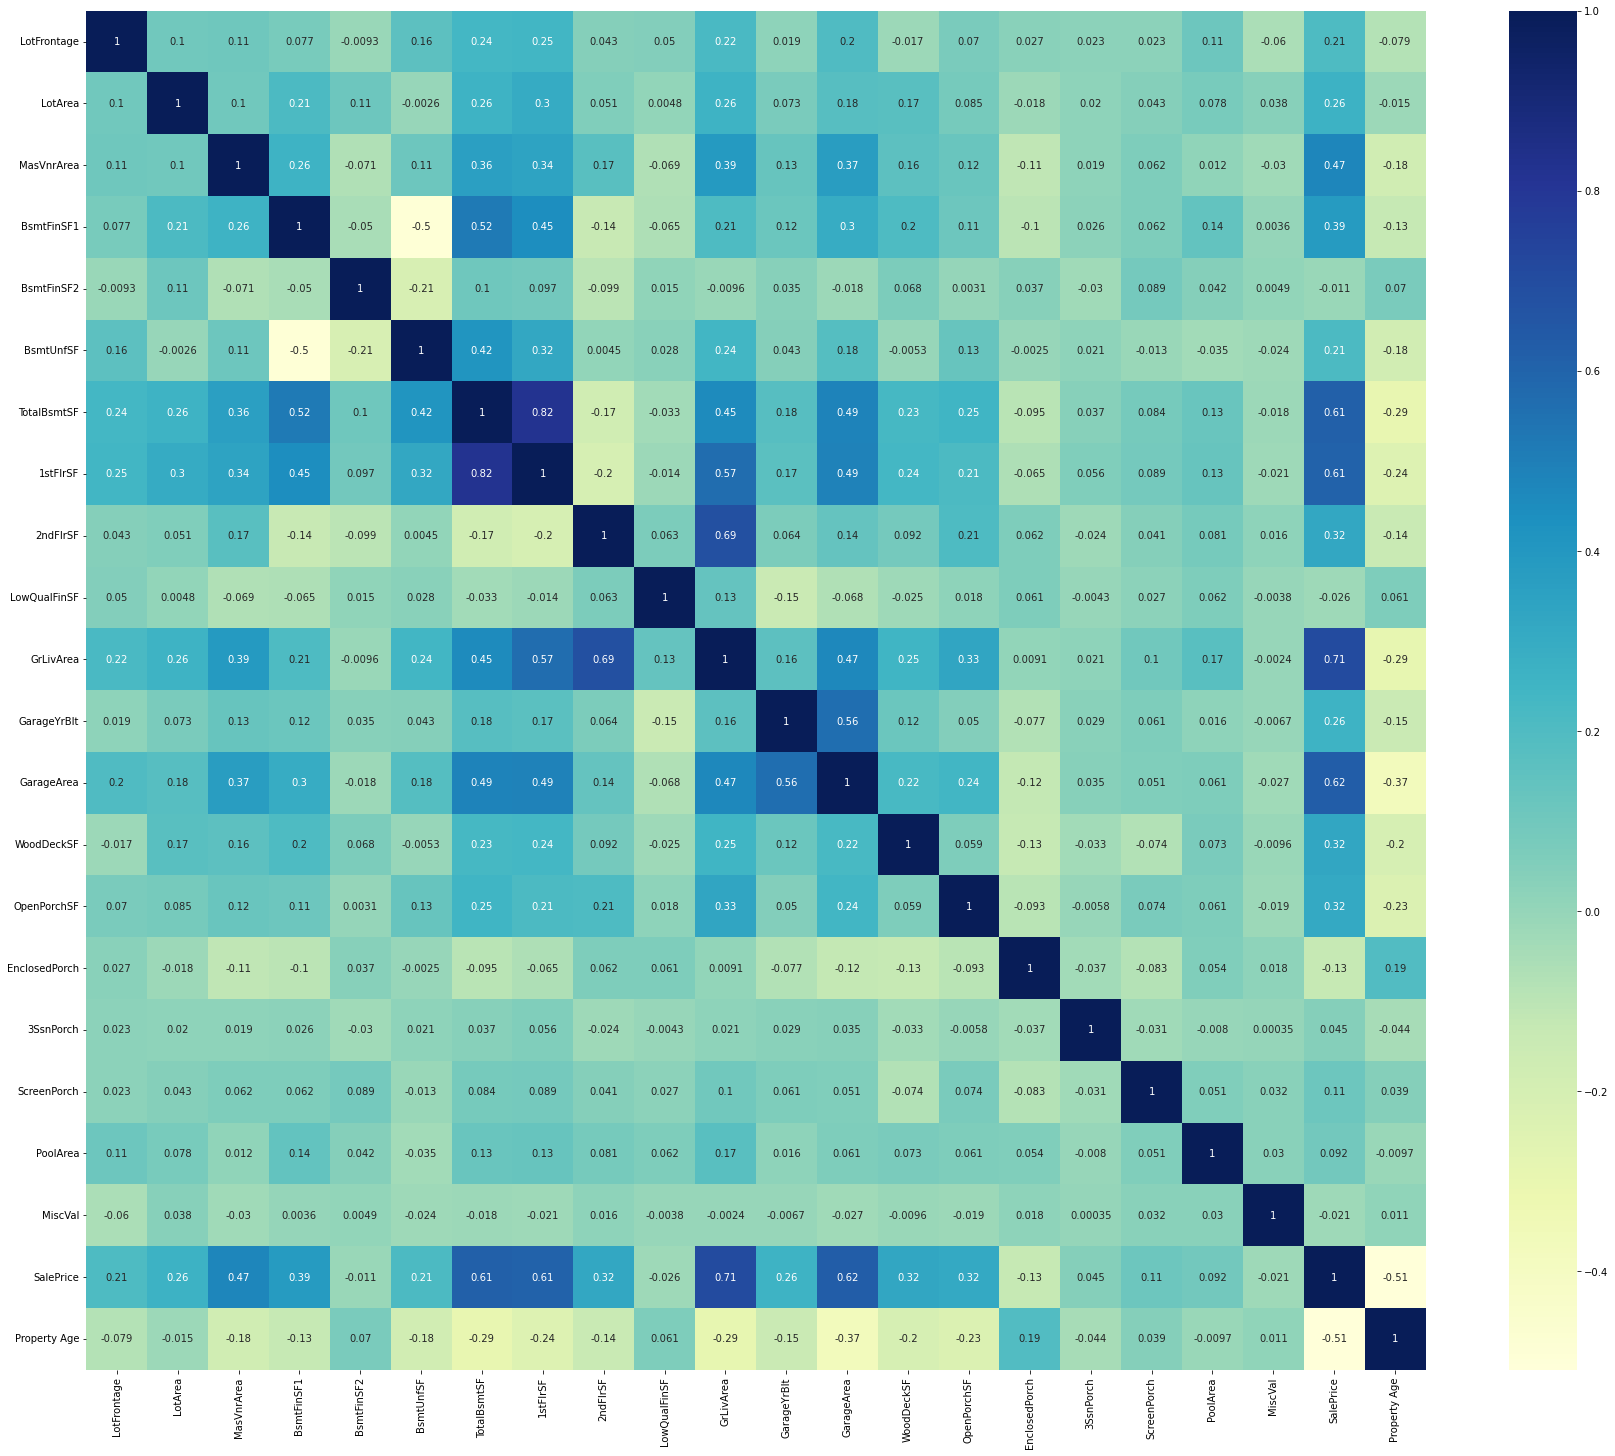

In [35]:
# List of Numeric type variables
list_of_columns = hpp_df.select_dtypes(include='int64').columns

# Plotting correlations on a heatmap
corr_matrix = hpp_df[list_of_columns].corr()
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Observation**

1) We can see 'Property Age' column is negatively correlated to 'SalePrice' as we predicted by creating 'Age Bucket' column. We will delete 'Property Age' column and focus on 'Age Bucket' column as it will might help as predicting 'SalePrice' more accurately.
'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'
'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
2) 'TotalBsmtSF', '1stFlrSF', 'GrLivArea' and 'GarageArea' are highly correlated with 'SalePrice'.

3) 'MiscVal', 'BsmtFinSF2' and 'LowQualFinSF' have least correlation with 'SalePrice'.

4) 'GrLivArea' and 'GarageArea' are highly correlated with some features.

5) 'TotalBsmtSF' and '1stFlrSF' are highly correlated with each other.

6) It seems 'TotalBsmtSF' is related to 'BsmtFinSF1', 'BsmtFinSF2' and 'BsmtUnfSF'.

7) It seems 'GrLivArea' is related to '1stFlrSF', '2ndFlrSF' and 'LowQualFinSF'.

In [36]:
# Validation check to see if 'TotalBsmtSF' is sum 'BsmtFinSF1', 'BsmtFinSF2' and 'BsmtUnfSF'
# We will take sum and compare the value to see if indeed the sum of 3 features
hpp_df[hpp_df['TotalBsmtSF'] != (hpp_df['BsmtFinSF1'] + hpp_df['BsmtFinSF2'] + hpp_df['BsmtUnfSF'])]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, SaleType, SaleCondition, SalePrice, Property Age, Age Bucket]
Index: []

**Observation** : So 'TotalBsmtSF' is sum 'BsmtFinSF1', 'BsmtFinSF2' and 'BsmtUnfSF'. We will delete these 3 features from data set and keep only 'TotalBsmtSF' since it is more correlated with 'SalePrice'

In [37]:
# Validation check to see if 'GrLivArea' is sum '1stFlrSF', '2ndFlrSF' and 'LowQualFinSF'
# We will take sum and compare the value to see if indeed the sum of 3 features
hpp_df[hpp_df['GrLivArea'] != (hpp_df['1stFlrSF'] + hpp_df['2ndFlrSF'] + hpp_df['LowQualFinSF'])]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, SaleType, SaleCondition, SalePrice, Property Age, Age Bucket]
Index: []

**Observation** : So 'GrLivArea' is sum '1stFlrSF', '2ndFlrSF' and 'LowQualFinSF'. We will delete these 3 features from data set and keep only 'GrLivArea' since it is more correlated with 'SalePrice'

In [38]:
# Remove 'Property Age' column as we will focus more on 'Age Bucket'
hpp_df.drop(labels = 'Property Age', axis = 1, inplace = True)

**Visualising Numerical Variables**

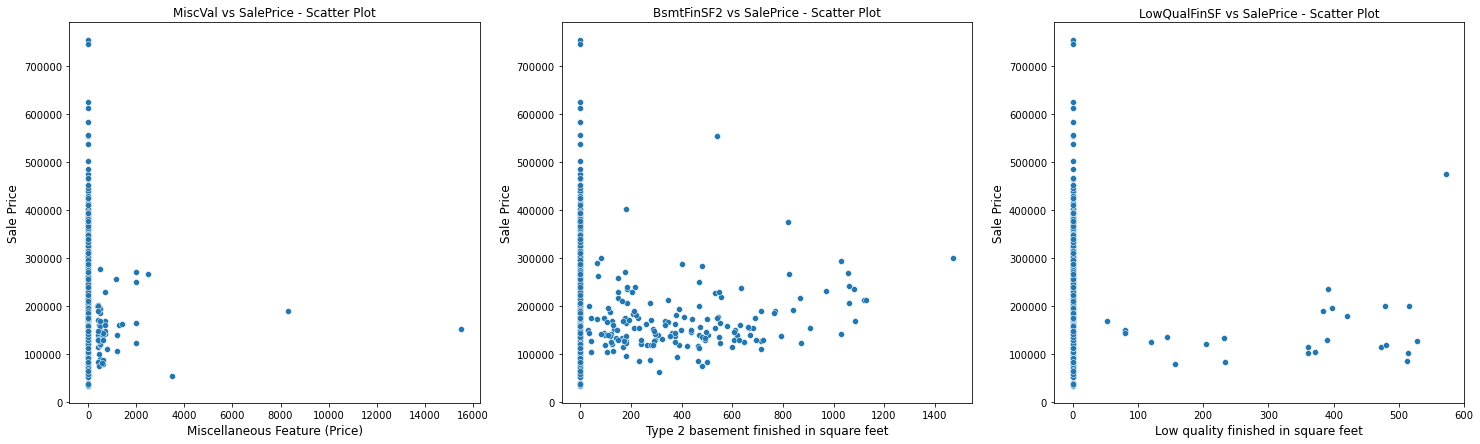

In [39]:
# List of features which have low correlation with SalePrice (-0.05 < correlation < 0.05)
list_of_columns = ['MiscVal', 'BsmtFinSF2', 'LowQualFinSF']

# Subplot - 1 rows and 3 columns
fig, axes = plt.subplots(1, 3)

# Scatter Plot of column OverallCond
sns.scatterplot(x = 'MiscVal', y = 'SalePrice', data = hpp_df, ax = axes[0])
axes[0].set_xlabel('Miscellaneous Feature (Price)', fontsize = 12)
axes[0].set_ylabel('Sale Price', fontsize = 12)
axes[0].set_title('MiscVal vs SalePrice - Scatter Plot')

# Scatter Plot of column BsmtFinSF2
sns.scatterplot(x = 'BsmtFinSF2', y = 'SalePrice', data = hpp_df, ax = axes[1])
axes[1].set_xlabel('Type 2 basement finished in square feet', fontsize = 12)
axes[1].set_ylabel('Sale Price', fontsize = 12)
axes[1].set_title('BsmtFinSF2 vs SalePrice - Scatter Plot')

# Scatter Plot of column LowQualFinSF
sns.scatterplot(x = 'LowQualFinSF', y = 'SalePrice', data = hpp_df, ax = axes[2])
axes[2].set_xlabel('Low quality finished in square feet', fontsize = 12)
axes[2].set_ylabel('Sale Price', fontsize = 12)
axes[2].set_title('LowQualFinSF vs SalePrice - Scatter Plot')

fig.set_size_inches(25, 7, forward = True)
plt.show()

**Observation** : We can see that the scatter spread is not that much with increasing sale price and all values lies mostly in zero. Most likely, this feature is unimportant for prediction.

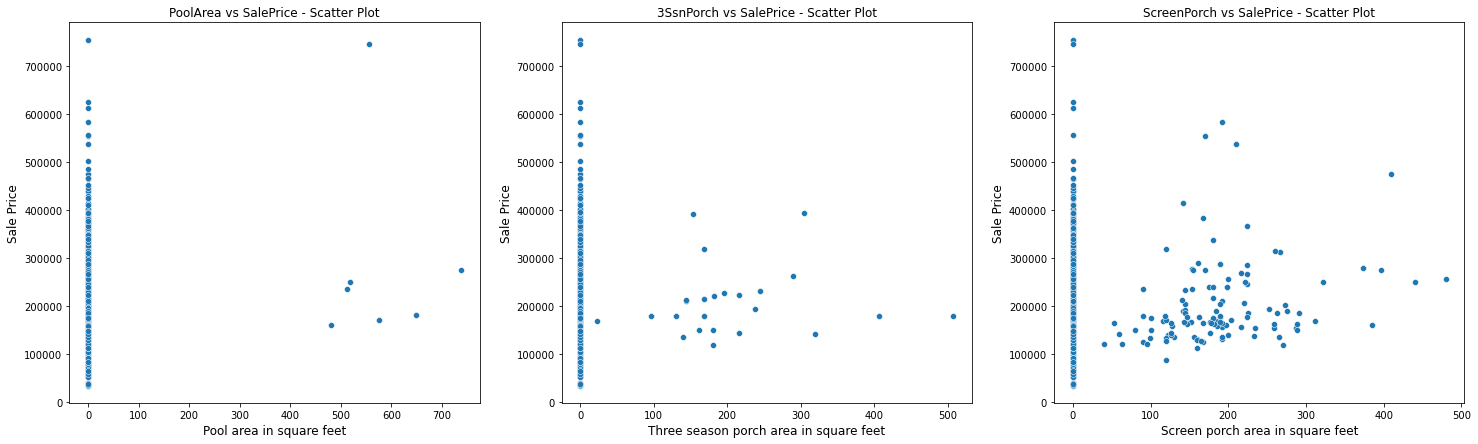

In [40]:
# List of features which have 0 value till 90th percentile
list_of_columns = ['PoolArea', '3SsnPorch', 'ScreenPorch']

# Subplot - 1 rows and 3 columns
fig, axes = plt.subplots(1, 3)

# Scatter Plot of column PoolArea
sns.scatterplot(x = 'PoolArea', y = 'SalePrice', data = hpp_df, ax = axes[0])
axes[0].set_xlabel('Pool area in square feet', fontsize = 12)
axes[0].set_ylabel('Sale Price', fontsize = 12)
axes[0].set_title('PoolArea vs SalePrice - Scatter Plot')

# Scatter Plot of column 3SsnPorch
sns.scatterplot(x = '3SsnPorch', y = 'SalePrice', data = hpp_df, ax = axes[1])
axes[1].set_xlabel('Three season porch area in square feet', fontsize = 12)
axes[1].set_ylabel('Sale Price', fontsize = 12)
axes[1].set_title('3SsnPorch vs SalePrice - Scatter Plot')

# Scatter Plot of column ScreenPorch
sns.scatterplot(x = 'ScreenPorch', y = 'SalePrice', data = hpp_df, ax = axes[2])
axes[2].set_xlabel('Screen porch area in square feet', fontsize = 12)
axes[2].set_ylabel('Sale Price', fontsize = 12)
axes[2].set_title('ScreenPorch vs SalePrice - Scatter Plot')

fig.set_size_inches(25, 7, forward = True)
plt.show()

**Observation** : We can see that the scatter spread is not that much with increasing sale price and all values lies mostly in zero. Most likely, this feature is unimportant for prediction.

Since the correlation is less for 'PoolArea' and '3SsnPorch' with 'SalePrice' and also 95% of these feature are zero. Let's drop these features as well.

In [41]:
# Function to plot Box plot and Distribution plot
def box_dist_plot(df, col):
    # Create Sub Plot
    fig, axes = plt.subplots(1, 2)
    
    # Box Plot of feature before removing outlier
    sns.boxplot(y = df[col], ax = axes[0])
    axes[0].set_title('Box Plot of {}'.format(col))
    axes[0].set_ylabel('Percentile Count')
    
    # Distribution Plot of column annual_inc
    sns.distplot(df[col], ax = axes[1])
    axes[1].set_xlabel('{}'.format(col), fontsize = 12)
    axes[1].set_title('Distribution Plot of {}'.format(col))

    fig.set_size_inches(20, 7, forward = True)
    plt.show()
    
# Function to remove outliers below 2 percentiles given as argument
def delete_outliers(df, col, lp, hp):
    # Percentile calculations
    Q1 = df[col].quantile(lp)
    Q3 = df[col].quantile(hp)
    IQR = Q3 - Q1
    Lower_Limit = Q1 - (1.5 * IQR)
    Upper_Limit = Q3 + (1.5 * IQR)

    # Remove outliers
    df = df[(df[col] >= Lower_Limit) & (df[col] <= Upper_Limit)]
    
    # Check the shape of the dataframe
    print('The data set now have {0} rows and {1} columns'.format(df.shape[0], df.shape[1]))
    
    # Return data frame to update it
    return df

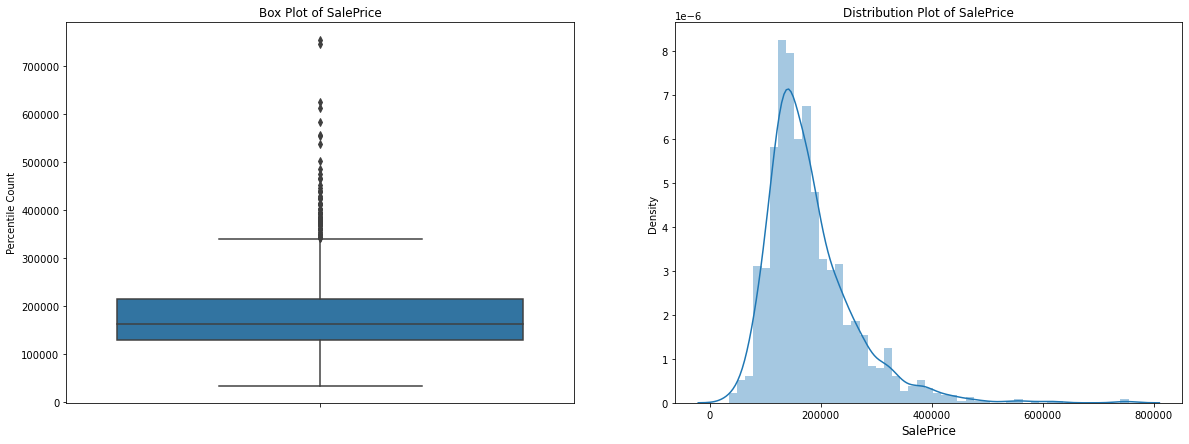

In [42]:
# Plot Box plot and Distribution plot of feature SalePrice
box_dist_plot(hpp_df, 'SalePrice')

**Observation** : We can see some extreme outliers above 700000. Let's see the row entries of these in data set. And also we can see that it is **positively skewed**.

In [43]:
# Display all SalePrice row entries where it is greater than or equal to 700000
hpp_df[hpp_df['SalePrice'] >= 700000]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
691          60       RL          104    21535   Pave  No Alley      IR1   
1182         60       RL          160    15623   Pave  No Alley      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle  \
691        Norm     1Fam     2Story          10           6     Gable   
1182       Norm     1Fam     2Story          10           5       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
691   WdShngl     HdBoard     HdBoard    BrkFace        1170        Ex   
1182  CompShg     Wd Sdng     ImStucc       None           0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
691         TA      PConc       Ex       TA           Gd          GLQ   
1182        TA      PConc       Ex       TA           Av          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
691         1455          Unf           0        989         2444    GasA   
1182        2096          Unf           0        300         2396    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691         Ex          Y      SBrkr      2444      1872             0   
1182        Ex          Y      SBrkr      2411      2065             0   

      GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
691        4316            0            1        3        1            4   
1182       4476            1            0        3        1            4   

     KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
691             1          Ex           10        Typ          2          Ex   
1182            1          Ex           10        Typ          2          TA   

     GarageType  GarageYrBlt GarageFinish GarageCars  GarageArea GarageQual  \
691      Attchd         1994          Fin          3         832         TA   
1182     Attchd         1996          Fin          3         813         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
691          TA          Y         382           50              0          0   
1182         TA          Y         171           78              0          0   

      ScreenPorch  PoolArea   PoolQC     Fence             MiscFeature  \
691             0         0  No Pool  No Fence  No Additional Features   
1182            0       555       Ex     MnPrv  No Additional Features   

      MiscVal SaleType SaleCondition  SalePrice Age Bucket  
691         0       WD        Normal     755000      10-20  
1182        0       WD       Abnorml     745000      10-20

**Observation** : SaleCondition is different for these 2 features and we can see that OverallQual, ExterQual etc. are top for these sales. So these data entries are important as well, hence we can't delete these outliers.

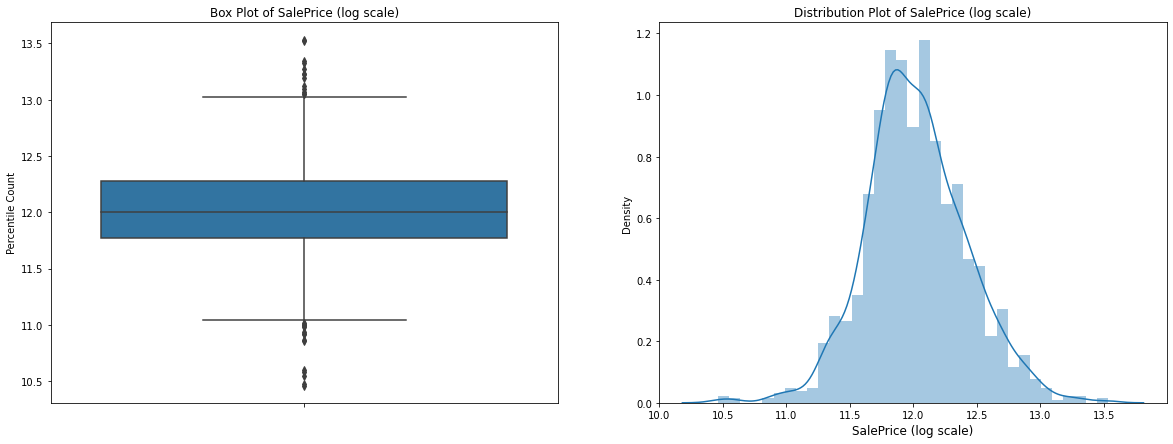

In [44]:
# Let's create a column for log transformed 'SalePrice'
#hpp_df['SalePrice (log scale)'] = np.log(hpp_df['SalePrice'])
temp_df = np.log(hpp_df['SalePrice']).to_frame()
temp_df.rename(columns = {'SalePrice':'SalePrice (log scale)'}, inplace = True)

# Plot Box plot and Distribution plot of feature SalePrice
box_dist_plot(temp_df, 'SalePrice (log scale)')

**Observation** : Positive skewness is removed by using log transformation.

In [45]:
# Calculate skewness and kurtosis
print('Skewness of SalePrice is changed from {0} to {1}'.format(hpp_df['SalePrice'].skew(), temp_df['SalePrice (log scale)'].skew()))
print('Kurtosis of SalePrice is changed from {0} to {1}'.format(hpp_df['SalePrice'].kurt(), temp_df['SalePrice (log scale)'].kurt()))

Skewness of SalePrice is changed from 1.8828757597682129 to 0.12133506220520406
Kurtosis of SalePrice is changed from 6.536281860064529 to 0.8095319958036296


**Observation** : Target variable was highly positively skewed (skew greater than 1) and highly peaked (kurtosis greater than 1)

Let's convert the target variable to log transformed, since data transformation made skew and kurtosis in acceptable range.

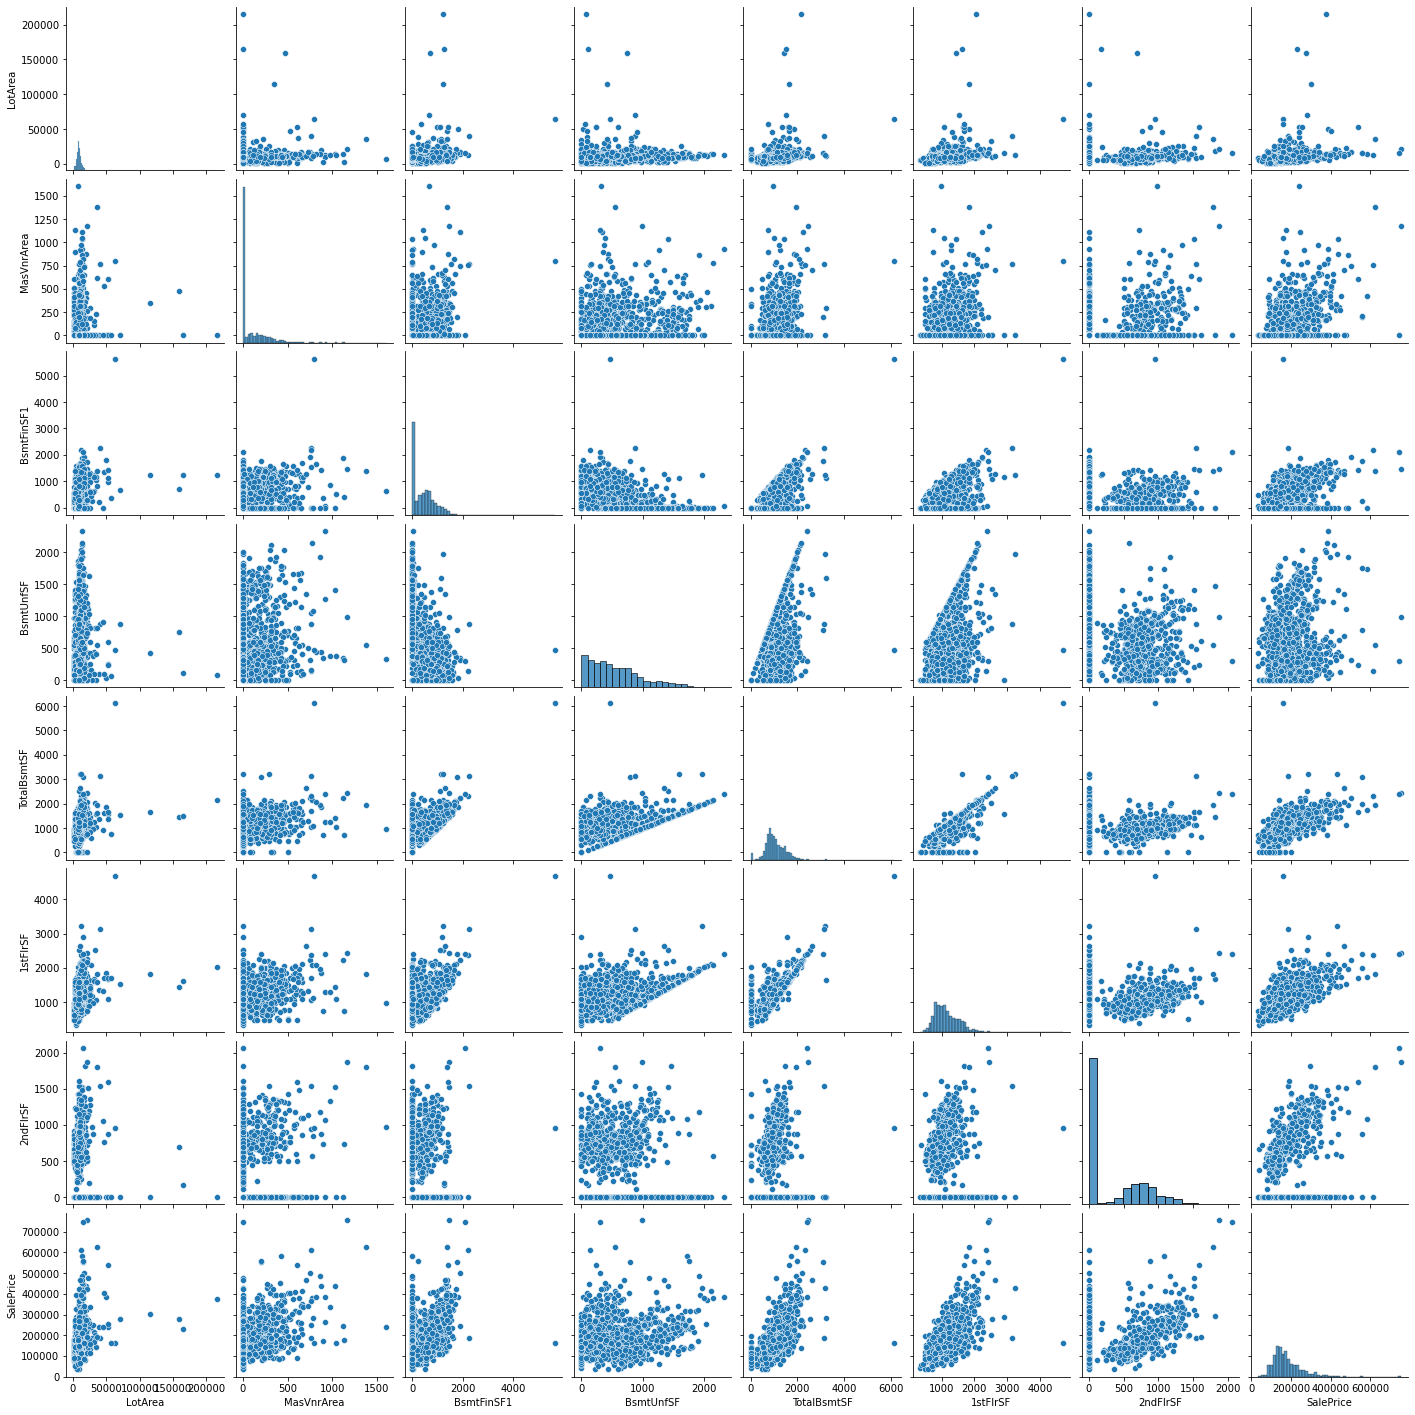

In [46]:
# Do Pair Plot of following features
list_of_columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation**

1) We can clearly see 'TotalBsmtSF' and '1stFlrSF' have strong relation with 'SalePrice' and also they are also highly correlated.

2) '2ndFlrSF' feature is slightly related to 'SalePrice' but it is strongly correlated to 'GrLivArea'.

3) 'MasVnrArea' looks is slightly related to 'SalePrice'.

4) 'LotArea' and 'BsmtFinSF1' have less spread.

5) 'BsmtUnfSF' feature have more spread in lower part of 'SalePrice' and it decreases with increase 'SalePrice'.

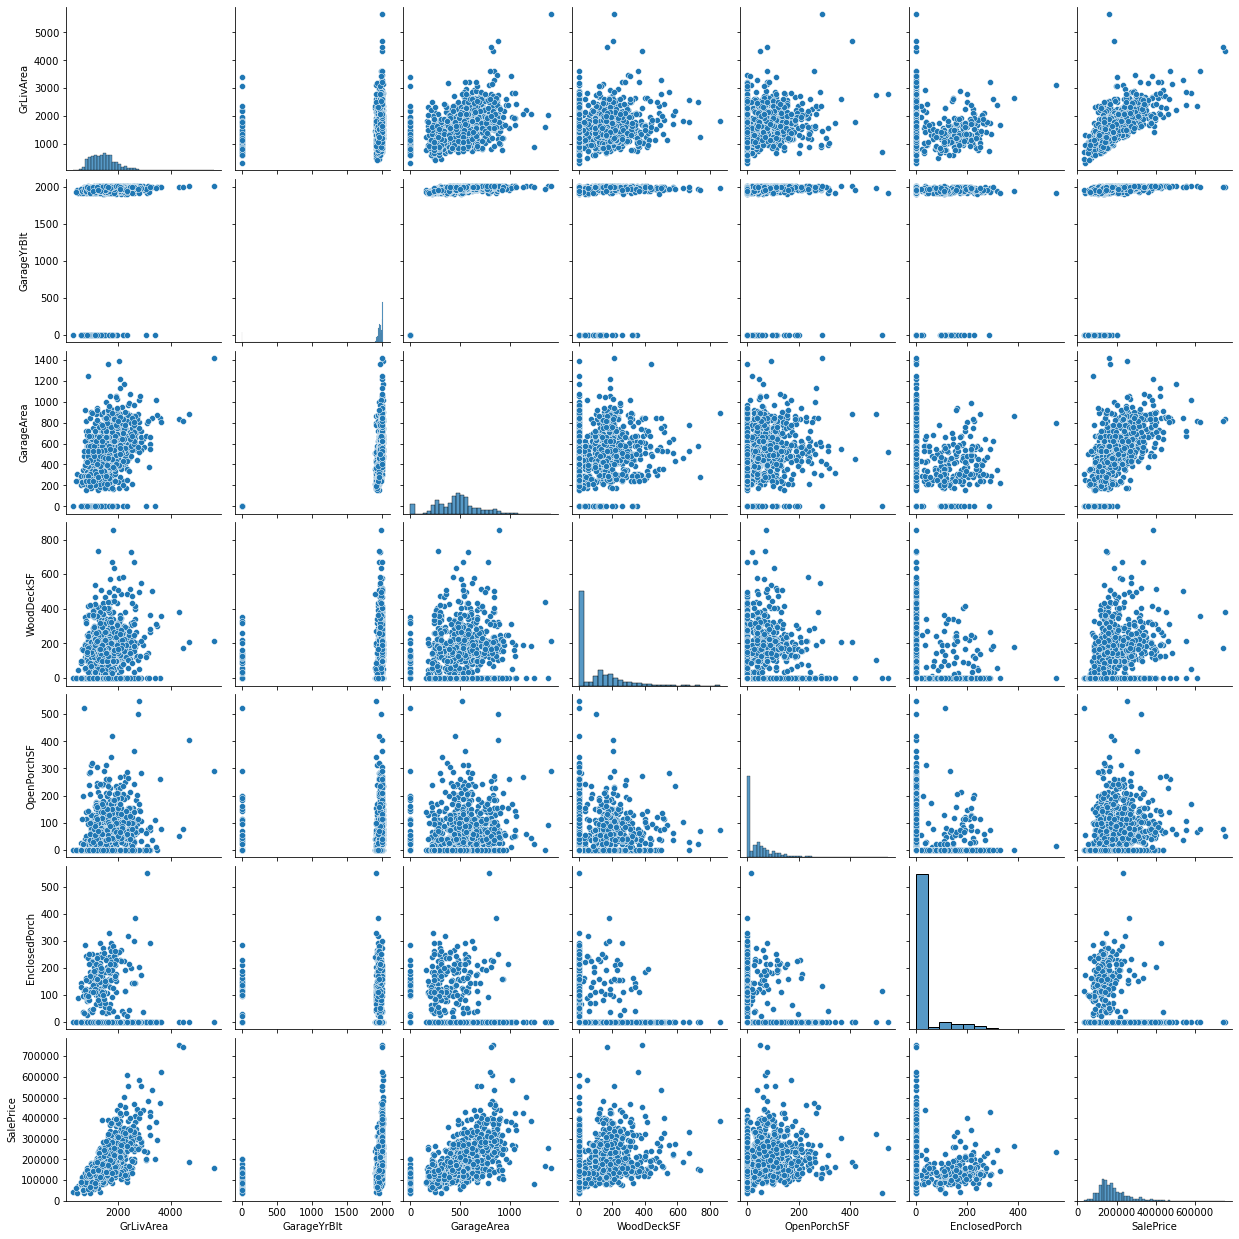

In [47]:
# Do Pair Plot of following features
list_of_columns = ['GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation**

1) 'GarageYrBlt' is more concentrated on year 2000 region.

2) 'GrLivArea' and 'GarageArea' are strongly related to 'SalePrice' as spread is increasing in linear relationship.

3) 'WoodDeckSF' and 'OpenPorchSF' are good with spread wise but we can see some level of data points lying on zero.

4) 'EnclosedPorch' have more data points lying on zero and have some spread in lower part of 'SalePrice', which explains the negative correlated value.

In [48]:
# Remove following columns due to low correlation and related to 'TotalBsmtSF' and 'GrLivArea'
list_of_columns = ['MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [49]:
# Remove following columns due to low correlation, 95% zero values and less scatter
list_of_columns = ['PoolArea', '3SsnPorch']
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

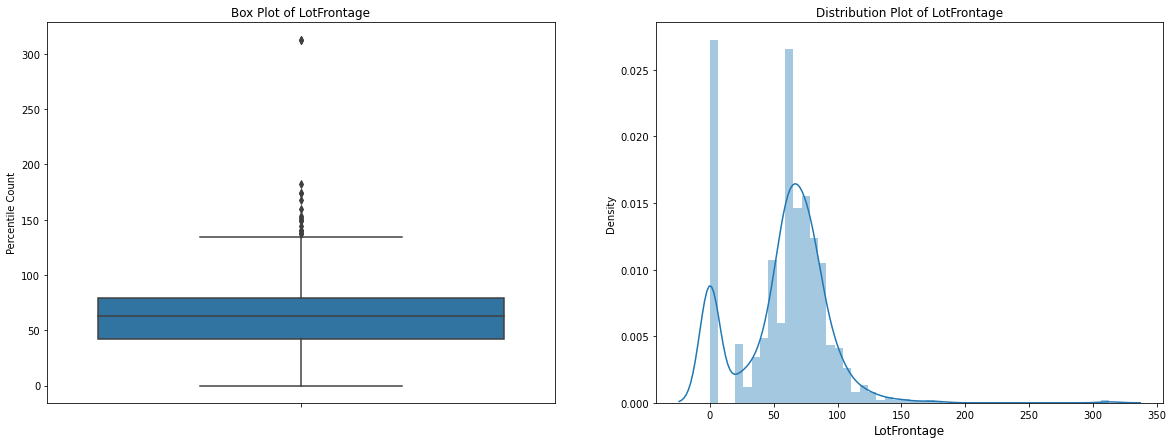

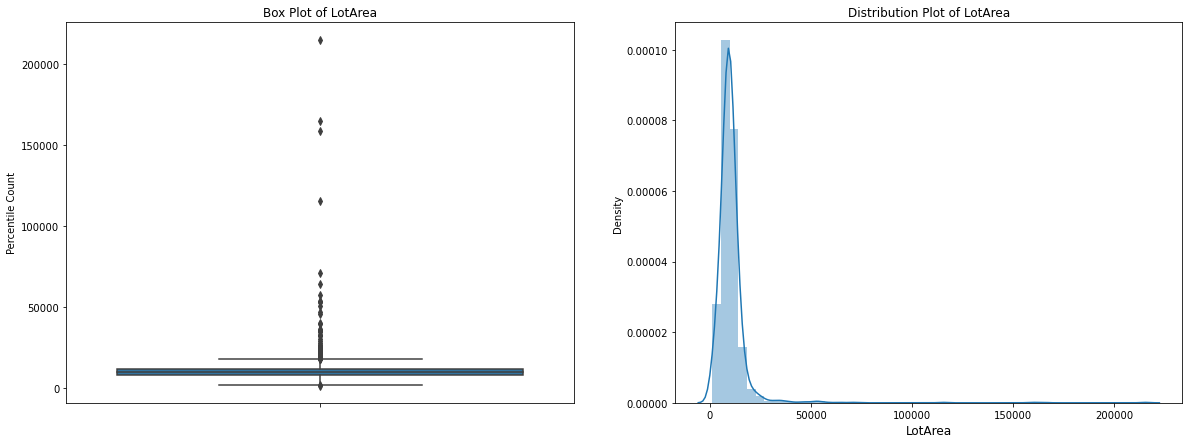

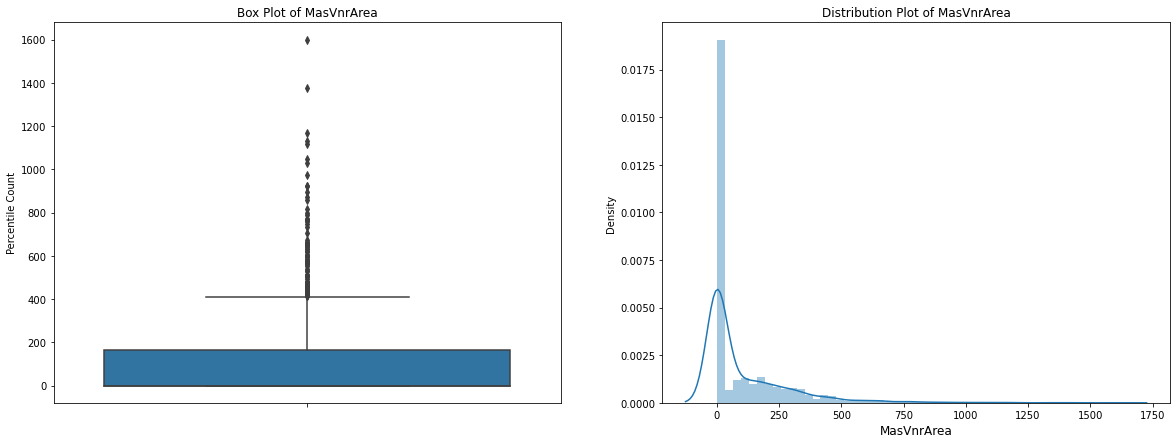

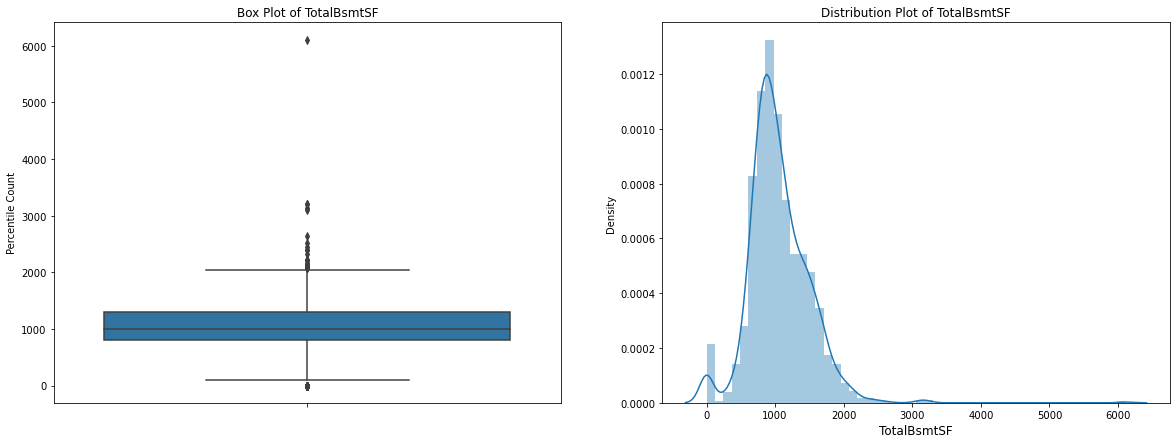

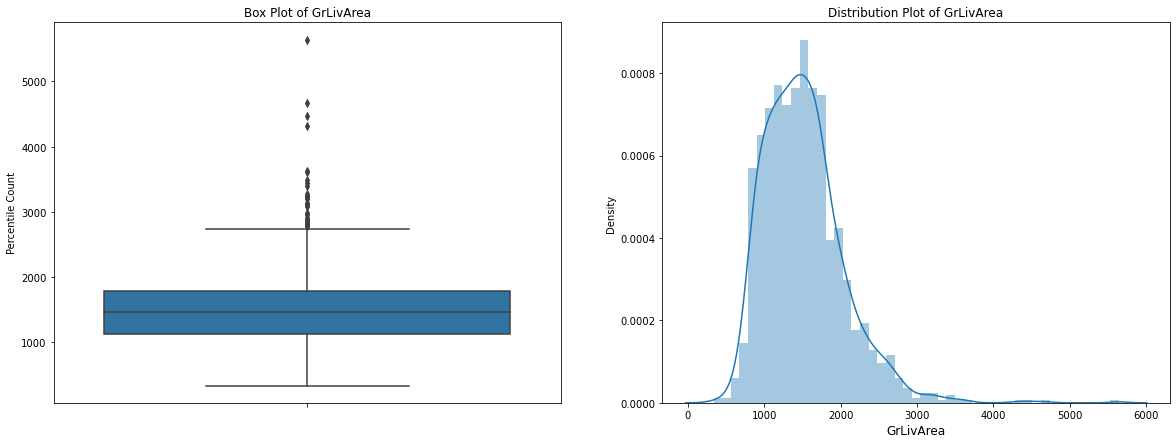

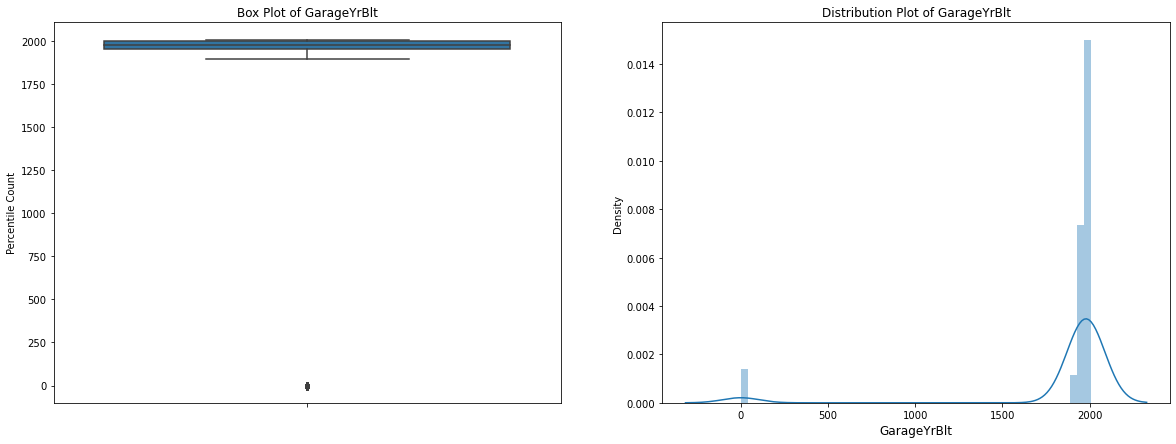

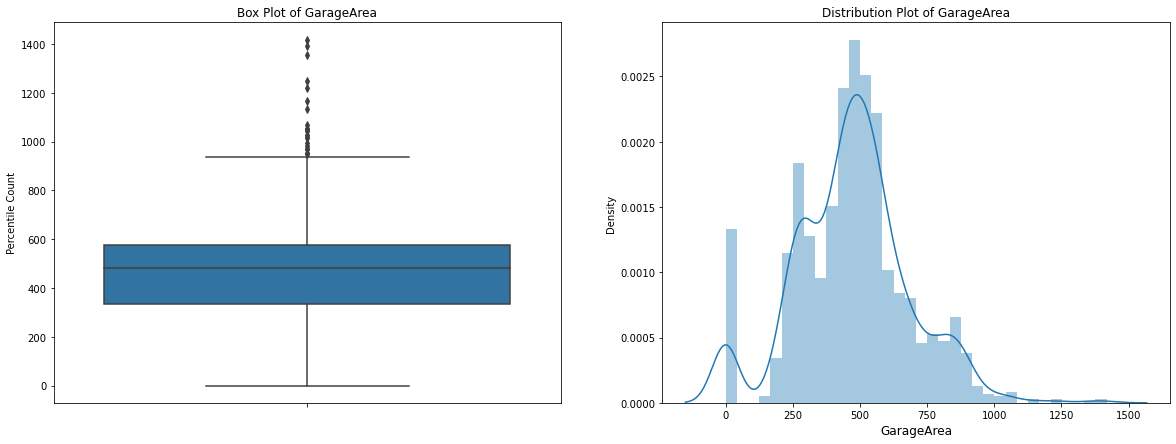

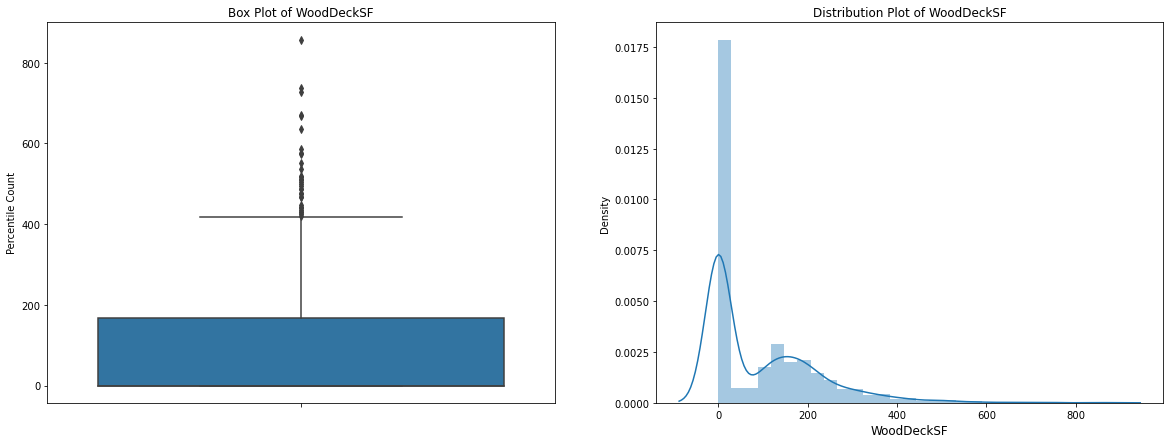

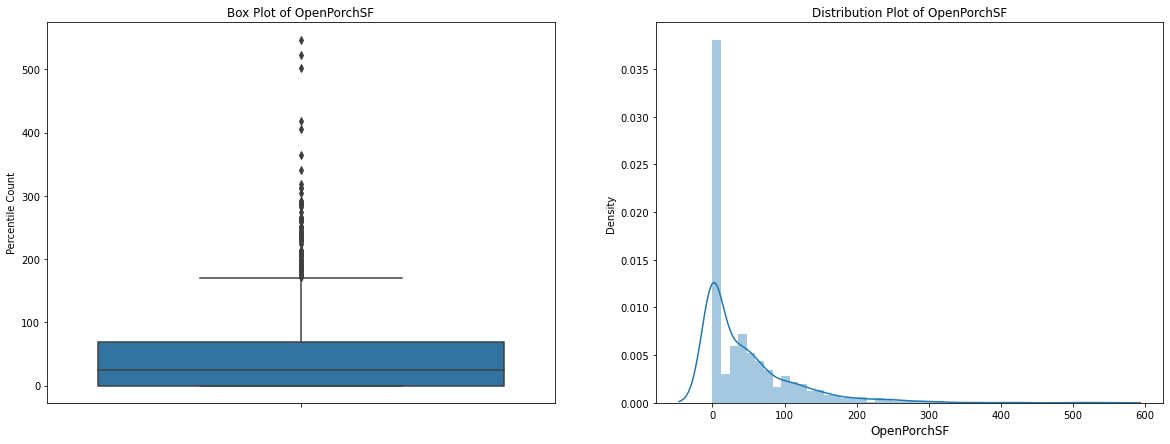

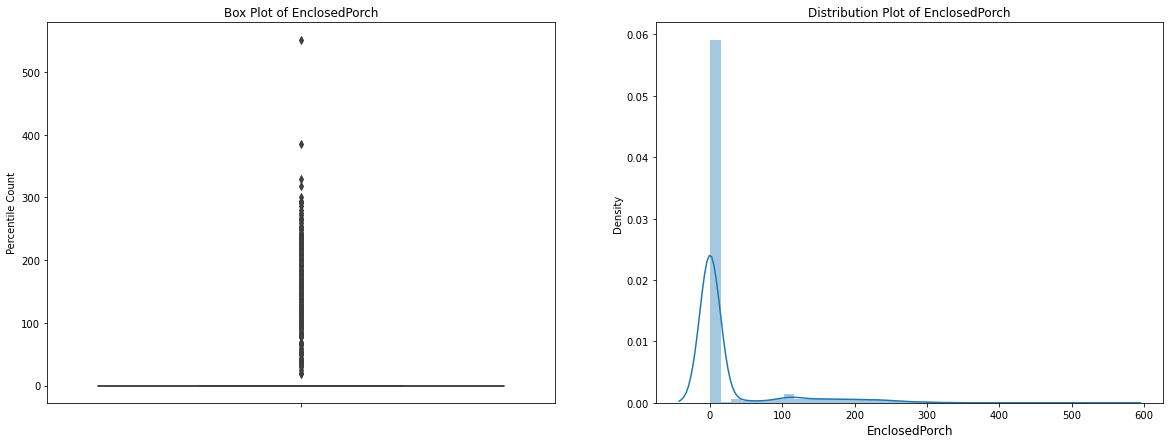

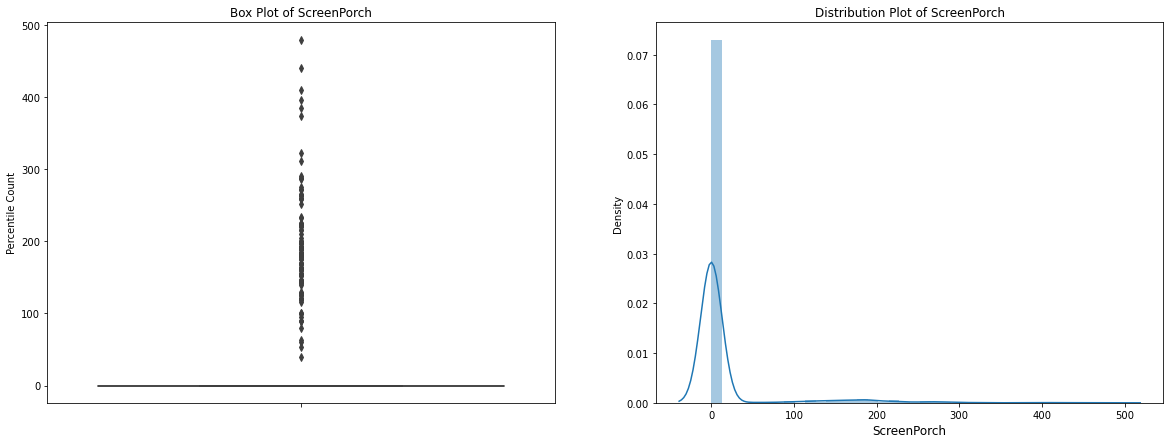

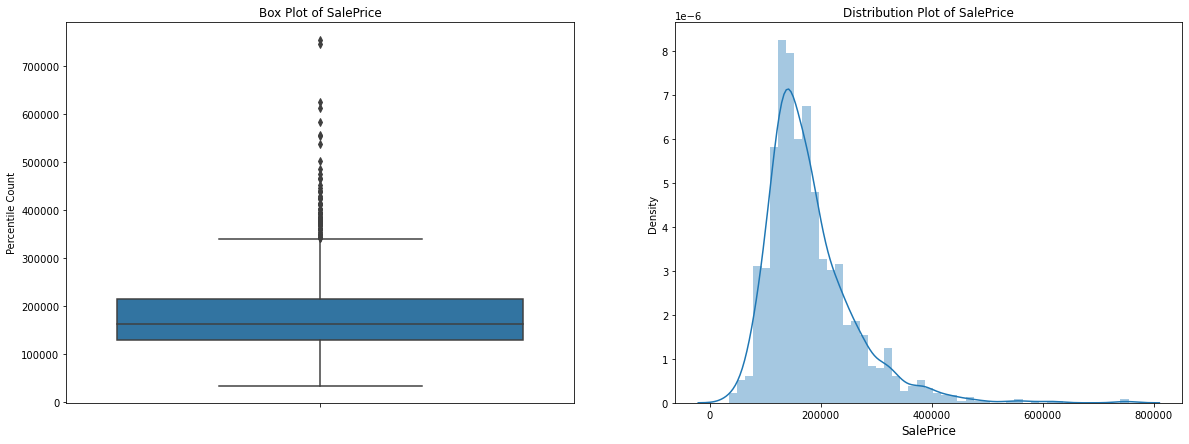

In [50]:
# List of Numeric type variables
list_of_columns = hpp_df.select_dtypes(include='int64').columns

for col in list_of_columns:
    box_dist_plot(hpp_df, col)

**Observation** : All numeric data is heavily skewed. Hence we need to scale the features properly.

In [51]:
# List of current Numeric type variables
numeric_columns = hpp_df.select_dtypes(include='int64').columns
print('Numeric columns are:\n', numeric_columns)

Numeric columns are:
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')


In [52]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(hpp_df.shape[0], hpp_df.shape[1]))

The data set now have 1460 rows and 68 columns


**Visualising Categorical Variables**

Since there are more categorical variables, visualizing all features can be difficult. Easy way is to plot most important categorical variables that defines the idea 'what makes a house sell itself'.
Selected variables are Overall House structure, Utilities, Kitchen Quality, Heating Condition, Fence etc. We will plot only these variables and rest of the categorical variables will analyzed using correlation matrix after converting them to numerical data.

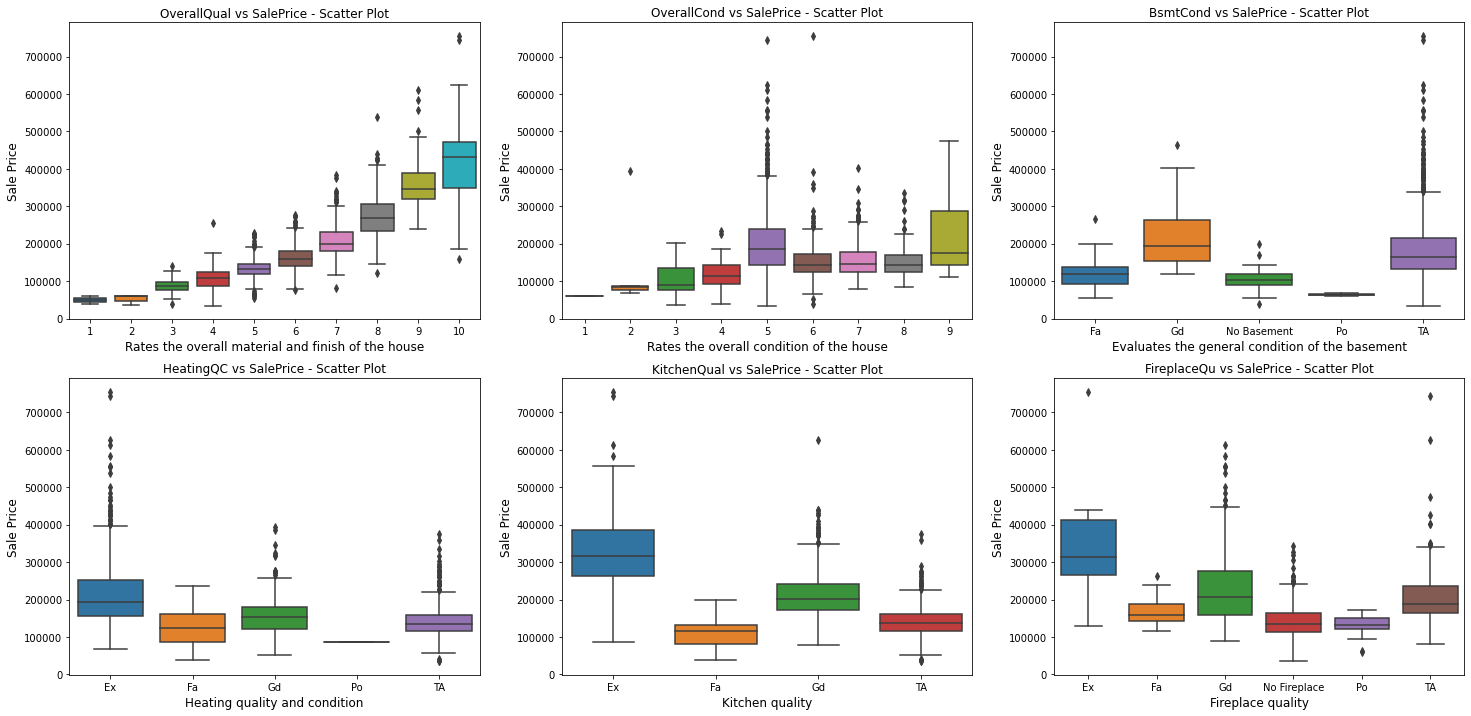

In [53]:
# Subplot - 2 rows and 3 columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 12))

# Box Plot of column 'OverallQual'
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = hpp_df, ax = axes[0][0])
axes[0][0].set_xlabel('Rates the overall material and finish of the house', fontsize = 12)
axes[0][0].set_ylabel('Sale Price', fontsize = 12)
axes[0][0].set_title('OverallQual vs SalePrice - Scatter Plot')

# Box Plot of column 'OverallCond'
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = hpp_df, ax = axes[0][1])
axes[0][1].set_xlabel('Rates the overall condition of the house', fontsize = 12)
axes[0][1].set_ylabel('Sale Price', fontsize = 12)
axes[0][1].set_title('OverallCond vs SalePrice - Scatter Plot')

# Box Plot of column 'BsmtCond'
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = hpp_df, ax = axes[0][2])
axes[0][2].set_xlabel('Evaluates the general condition of the basement', fontsize = 12)
axes[0][2].set_ylabel('Sale Price', fontsize = 12)
axes[0][2].set_title('BsmtCond vs SalePrice - Scatter Plot')

# Box Plot of column 'HeatingQC'
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = hpp_df, ax = axes[1][0])
axes[1][0].set_xlabel('Heating quality and condition', fontsize = 12)
axes[1][0].set_ylabel('Sale Price', fontsize = 12)
axes[1][0].set_title('HeatingQC vs SalePrice - Scatter Plot')

# Box Plot of column 'KitchenQual'
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = hpp_df, ax = axes[1][1])
axes[1][1].set_xlabel('Kitchen quality', fontsize = 12)
axes[1][1].set_ylabel('Sale Price', fontsize = 12)
axes[1][1].set_title('KitchenQual vs SalePrice - Scatter Plot')

# Box Plot of column 'FireplaceQu'
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = hpp_df, ax = axes[1][2])
axes[1][2].set_xlabel('Fireplace quality', fontsize = 12)
axes[1][2].set_ylabel('Sale Price', fontsize = 12)
axes[1][2].set_title('FireplaceQu vs SalePrice - Scatter Plot')

plt.show()

**Observation**

1) As the overall material and finish of the house increases, the sale price also increases. We can see more spread in Very Excellent (10) category.

2) Mostly the houses sold have the overall condition of the house as Average (5) category.

3) Mostly the houses sold have typical (TA) basement.

4) More houses are sold with excellent heating quality.

5) Mostly the houses sold have typical (TA) kitchen. While excellent quality creates huge sale price.

6) Mostly the houses sold have no fireplace. While excellent quality of fireplace creates huge sale price.

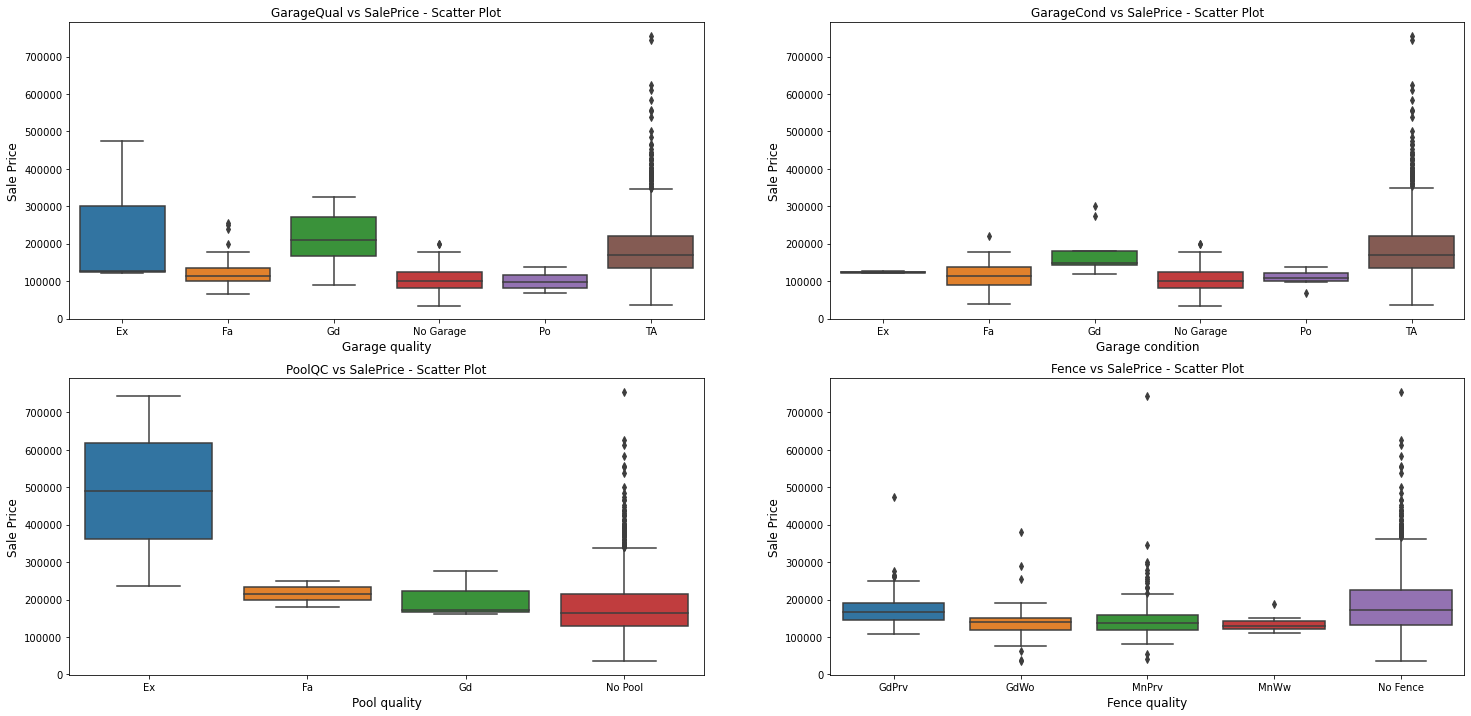

In [54]:
# Subplot - 2 rows and 2 columns
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 12))

# Box Plot of column 'GarageQual'
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = hpp_df, ax = axes[0][0])
axes[0][0].set_xlabel('Garage quality', fontsize = 12)
axes[0][0].set_ylabel('Sale Price', fontsize = 12)
axes[0][0].set_title('GarageQual vs SalePrice - Scatter Plot')

# Box Plot of column 'GarageCond'
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = hpp_df, ax = axes[0][1])
axes[0][1].set_xlabel('Garage condition', fontsize = 12)
axes[0][1].set_ylabel('Sale Price', fontsize = 12)
axes[0][1].set_title('GarageCond vs SalePrice - Scatter Plot')

# Box Plot of column 'PoolQC'
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = hpp_df, ax = axes[1][0])
axes[1][0].set_xlabel('Pool quality', fontsize = 12)
axes[1][0].set_ylabel('Sale Price', fontsize = 12)
axes[1][0].set_title('PoolQC vs SalePrice - Scatter Plot')

# Box Plot of column 'Fence'
sns.boxplot(x = 'Fence', y = 'SalePrice', data = hpp_df, ax = axes[1][1])
axes[1][1].set_xlabel('Fence quality', fontsize = 12)
axes[1][1].set_ylabel('Sale Price', fontsize = 12)
axes[1][1].set_title('Fence vs SalePrice - Scatter Plot')

plt.show()

**Observation**

1) Mostly the houses sold have typical (TA) garage quality and condition.

2) Mostly people doesn't prefer if pool or fence is available or not.

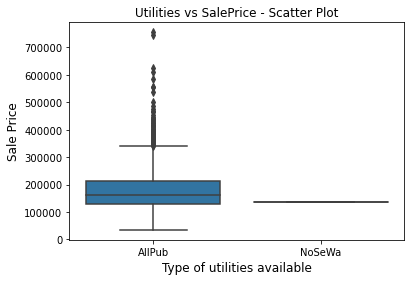

In [55]:
# Box Plot of column 'Utilities'
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = hpp_df)
plt.xlabel('Type of utilities available', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Utilities vs SalePrice - Scatter Plot')
plt.show()

**Observation** : 99.9% houses sold have all public utilities.

Let's do **Mapping** of ordered categorical variables to numeric value. We can use label encoding here, but it is difficult to say which category level was maaped. Hence we do manual mapping.

In [56]:
# Convert LotShape feature to numerical rank
temp_dict = {'Reg' : 3, 'IR1' : 2, 'IR2' : 1, 'IR3' : 0}
hpp_df['LotShape'] = hpp_df['LotShape'].map(temp_dict).astype('int64')

In [57]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'Po' : 0}
list_of_columns = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

In [58]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'No Basement' : 0, 'No Fireplace' : 0, 'No Garage' : 0}
list_of_columns = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

In [59]:
# Convert LotShape feature to numerical rank
temp_dict = {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'No Basement' : 0}
hpp_df['BsmtExposure'] = hpp_df['BsmtExposure'].map(temp_dict).astype('int64')

In [60]:
# Convert GarageFinish feature to numerical rank
temp_dict = {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'No Garage' : 0}
hpp_df['GarageFinish'] = hpp_df['GarageFinish'].map(temp_dict).astype('int64')

In [61]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'No Pool' : 0}
hpp_df['PoolQC'] = hpp_df['PoolQC'].map(temp_dict).astype('int64')

In [62]:
# Convert following features to numerical rank
temp_dict = {'Y' : 1, 'N' : 0}
hpp_df['CentralAir'] = hpp_df['CentralAir'].map(temp_dict).astype('int64')

In [63]:
# Convert following features to numerical rank
list_of_columns = ['OverallQual', 'OverallCond']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].astype('int64')

In [64]:
# On further analysis, it was observed that the following columns are ordered and labeled.
# Hence we will change the data type to int type
list_of_columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                   'TotRmsAbvGrd', 'GarageCars']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].astype('int64')

In [65]:
# Convert following features to numerical rank
temp_dict = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'No Basement' : 0}
list_of_columns = ['BsmtFinType1', 'BsmtFinType2']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

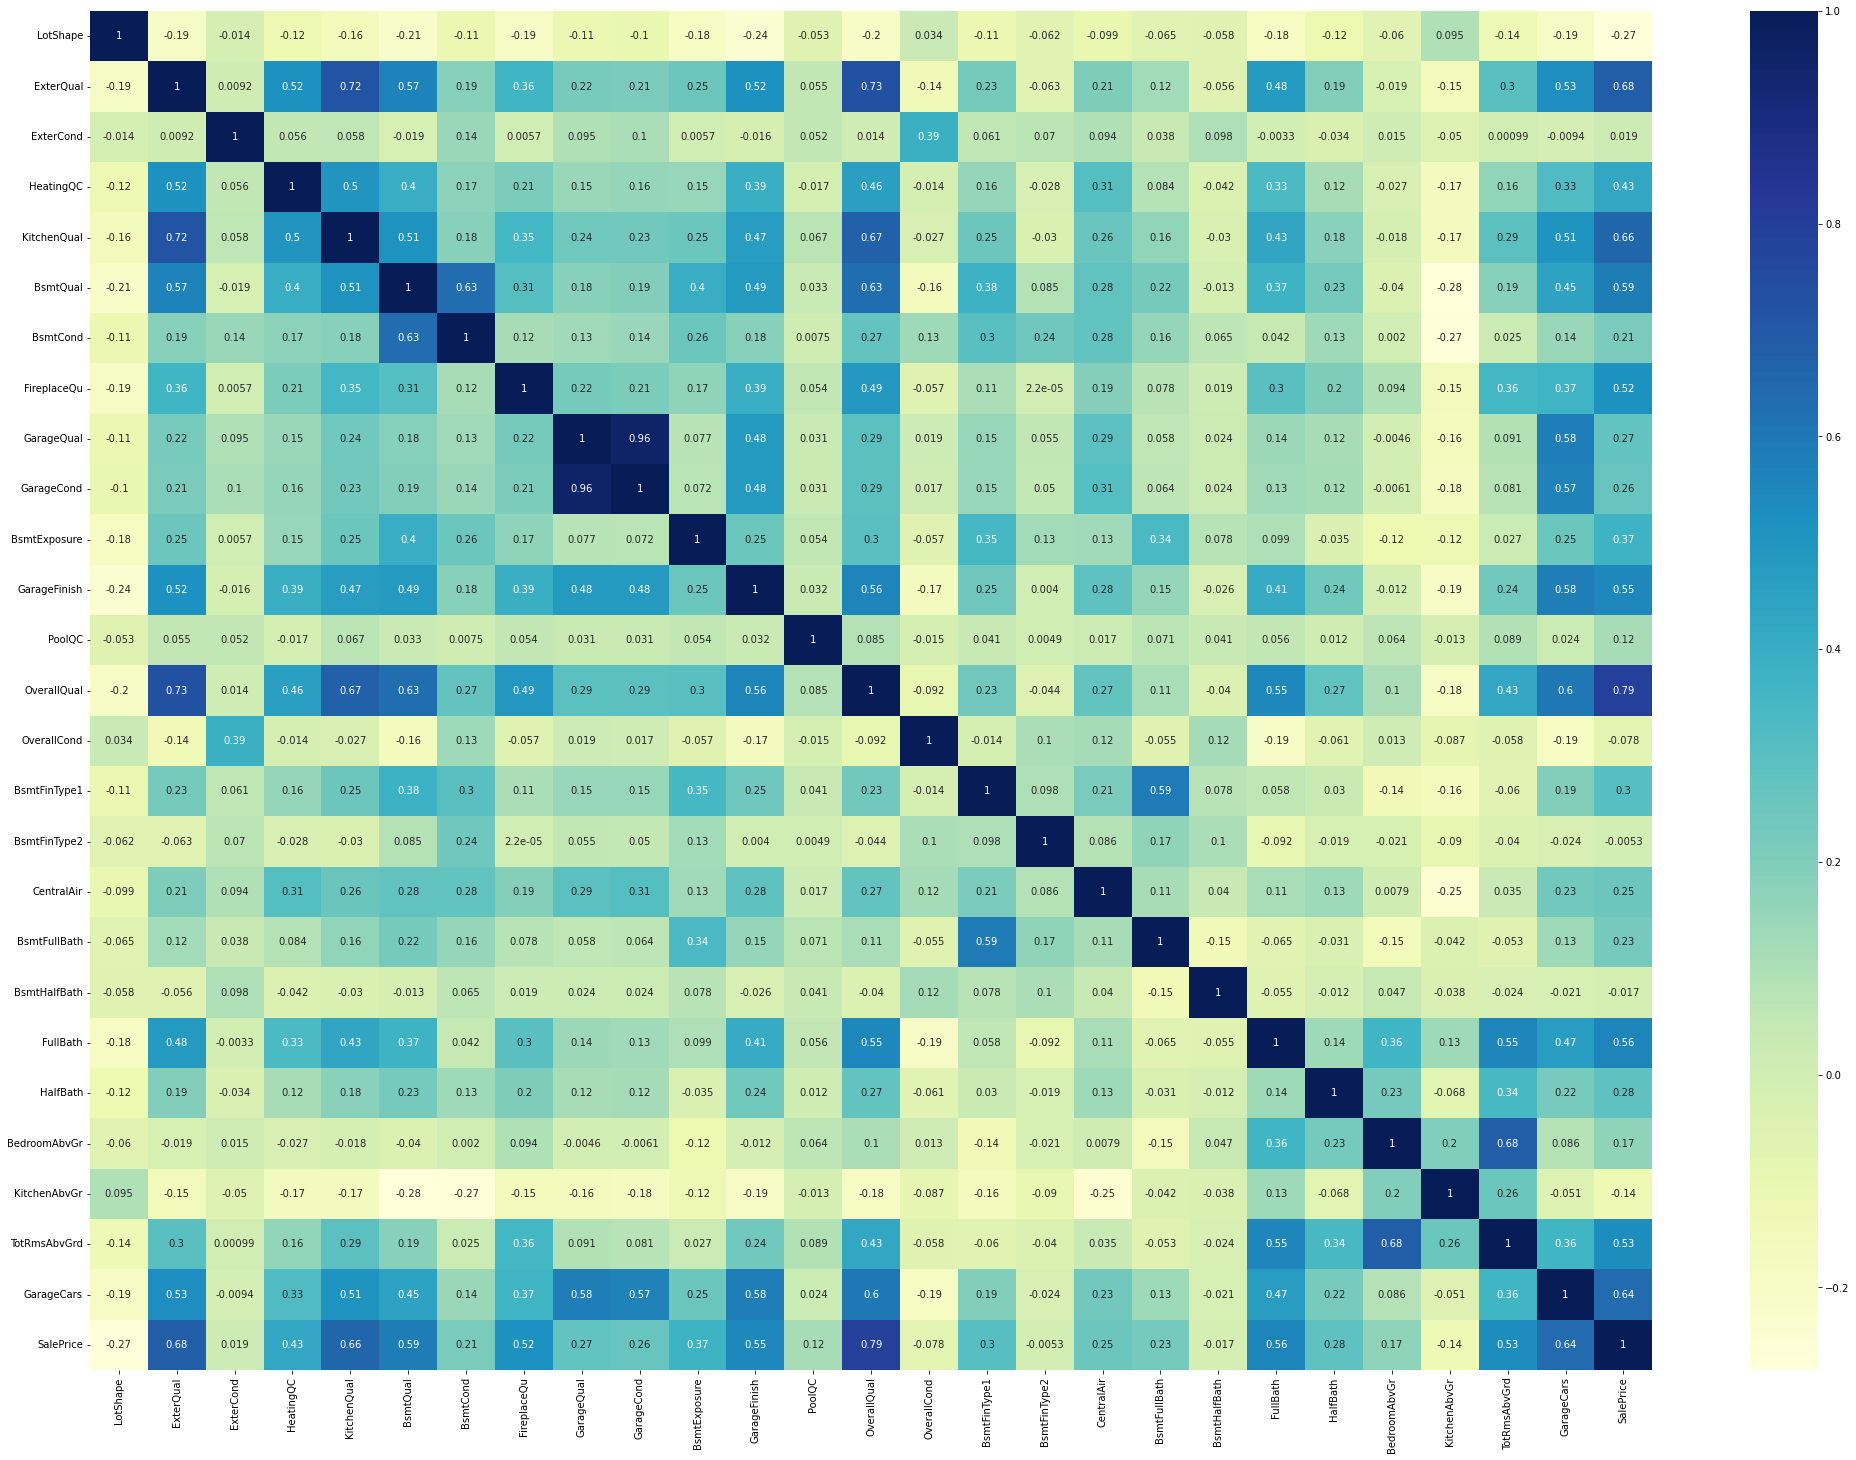

In [66]:
# List of Ordered Categorical variables
list_of_columns = ['LotShape', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond',
                   'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'GarageFinish', 'PoolQC',
                   'OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'BsmtFullBath',
                   'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                   'GarageCars', 'SalePrice']

# Plotting correlations on a heatmap
corr_matrix = hpp_df[list_of_columns].corr()
plt.figure(figsize=(35, 25))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Observations**

1) 'BsmtFinType2' is least related to 'SalePrice'. We will remove this variable.

2) 'OverallQual' and 'ExterQual' are highly correlated to 'SalePrice'.

3) Lot of features have high correlation with 'SalePrice' and other feaures.

In [67]:
# Check the percentile and min-max of Ordered Categorical variables
hpp_df[list_of_columns].describe()

LotShape  ExterQual  ExterCond  HeatingQC  KitchenQual   BsmtQual  \
count  1460.0000  1460.0000  1460.0000  1460.0000    1460.0000  1460.0000   
mean      2.5918     2.3959     2.0836     3.1452       2.5116     3.4890   
std       0.5823     0.5743     0.3511     0.9595       0.6638     0.8765   
min       0.0000     1.0000     0.0000     0.0000       1.0000     0.0000   
25%       2.0000     2.0000     2.0000     2.0000       2.0000     3.0000   
50%       3.0000     2.0000     2.0000     4.0000       2.0000     4.0000   
75%       3.0000     3.0000     2.0000     4.0000       3.0000     4.0000   
max       3.0000     4.0000     4.0000     4.0000       4.0000     5.0000   

        BsmtCond  FireplaceQu  GarageQual  GarageCond  BsmtExposure  \
count  1460.0000    1460.0000   1460.0000   1460.0000     1460.0000   
mean      2.9349       1.8253      2.8103      2.8089        1.6301   
std       0.5522       1.8109      0.7229      0.7197        1.0674   
min       0.0000       0.0000      0.0000      0.0000        0.0000   
25%       3.0000       0.0000      3.0000      3.0000        1.0000   
50%       3.0000       2.0000      3.0000      3.0000        1.0000   
75%       3.0000       4.0000      3.0000      3.0000        2.0000   
max       4.0000       5.0000      5.0000      5.0000        4.0000   

       GarageFinish     PoolQC  OverallQual  OverallCond  BsmtFinType1  \
count     1460.0000  1460.0000    1460.0000    1460.0000     1460.0000   
mean         1.7158     0.0130       6.0993       5.5753        3.5459   
std          0.8928     0.2041       1.3830       1.1128        2.1078   
min          0.0000     0.0000       1.0000       1.0000        0.0000   
25%          1.0000     0.0000       5.0000       5.0000        1.0000   
50%          2.0000     0.0000       6.0000       5.0000        4.0000   
75%          2.0000     0.0000       7.0000       6.0000        6.0000   
max          3.0000     4.0000      10.0000       9.0000        6.0000   

       BsmtFinType2  CentralAir  BsmtFullBath  BsmtHalfBath   FullBath  \
count     1460.0000   1460.0000     1460.0000     1460.0000  1460.0000   
mean         1.2473      0.9349        0.4253        0.0575     1.5651   
std          0.8923      0.2467        0.5189        0.2388     0.5509   
min          0.0000      0.0000        0.0000        0.0000     0.0000   
25%          1.0000      1.0000        0.0000        0.0000     1.0000   
50%          1.0000      1.0000        0.0000        0.0000     2.0000   
75%          1.0000      1.0000        1.0000        0.0000     2.0000   
max          6.0000      1.0000        3.0000        2.0000     3.0000   

        HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
count  1460.0000     1460.0000     1460.0000     1460.0000   1460.0000   
mean      0.3829        2.8664        1.0466        6.5178      1.7671   
std       0.5029        0.8158        0.2203        1.6254      0.7473   
min       0.0000        0.0000        0.0000        2.0000      0.0000   
25%       0.0000        2.0000        1.0000        5.0000      1.0000   
50%       0.0000        3.0000        1.0000        6.0000      2.0000   
75%       1.0000        3.0000        1.0000        7.0000      2.0000   
max       2.0000        8.0000        3.0000       14.0000      4.0000   

         SalePrice  
count    1460.0000  
mean   180921.1959  
std     79442.5029  
min     34900.0000  
25%    129975.0000  
50%    163000.0000  
75%    214000.0000  
max    755000.0000

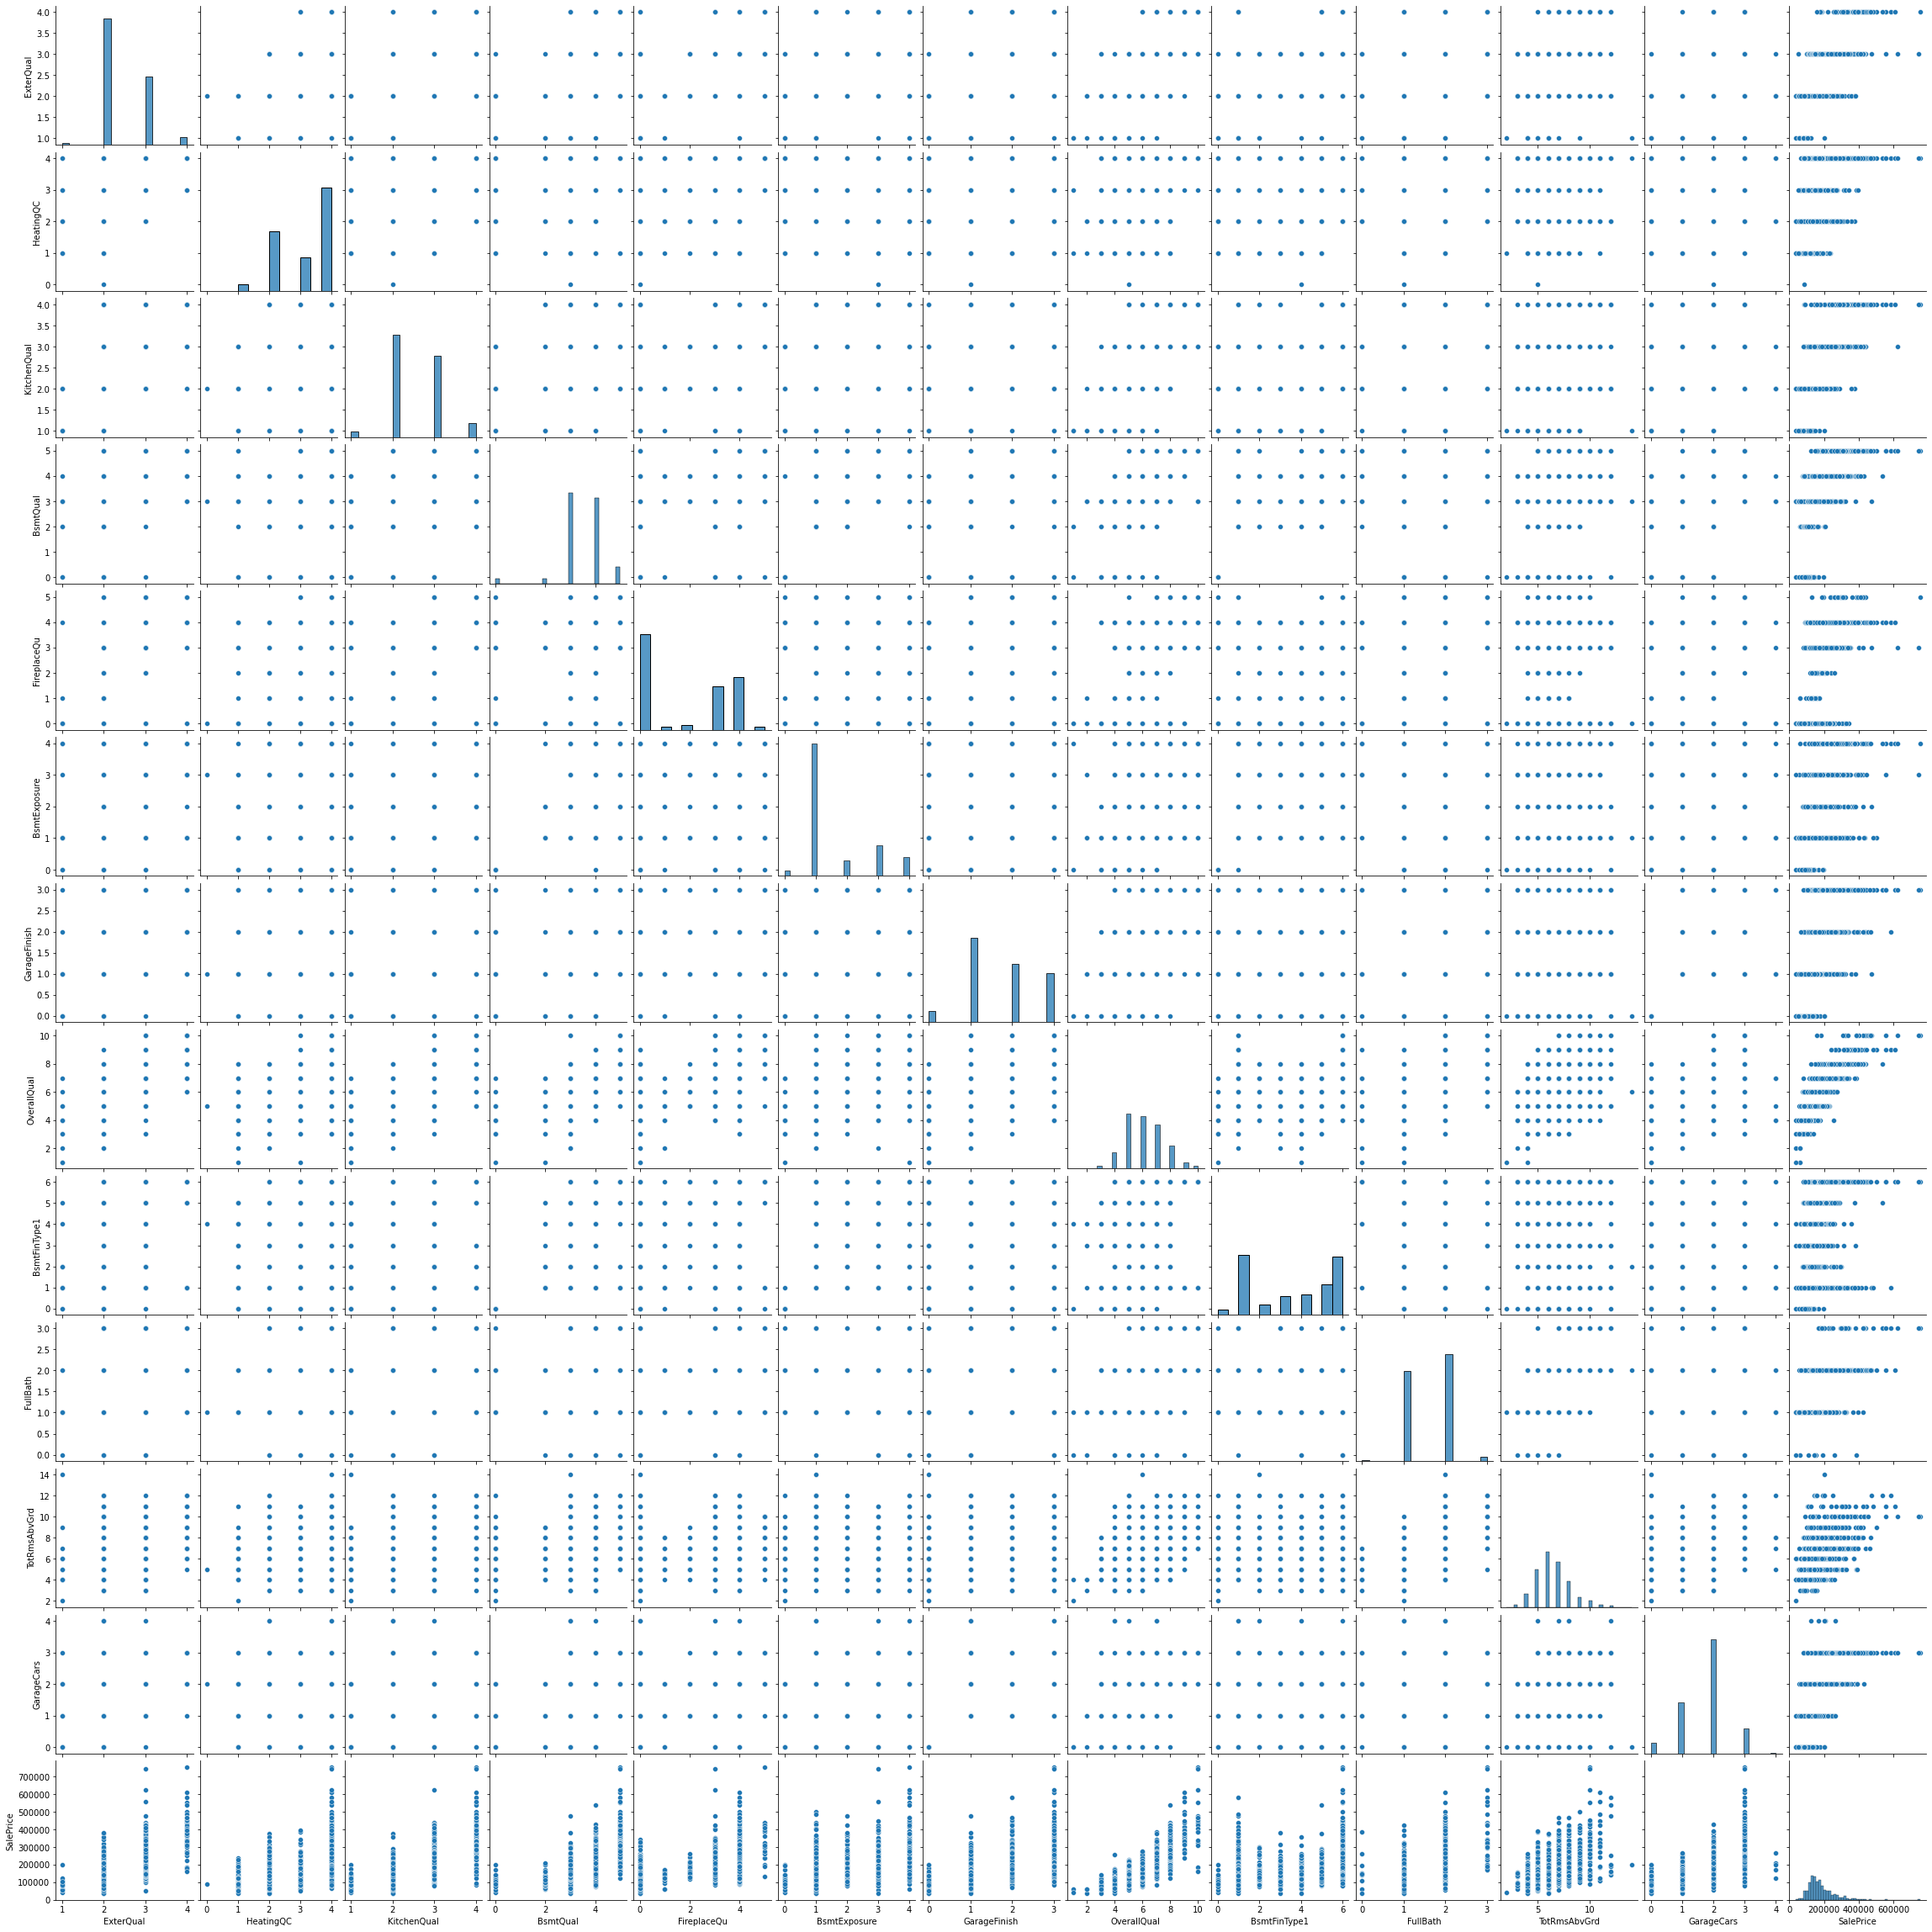

In [68]:
# Do Pair Plot of following Ordered Categorical variables with 'SalePrice'
list_of_columns = ['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual',
                   'FireplaceQu', 'BsmtExposure', 'GarageFinish',
                   'OverallQual', 'BsmtFinType1', 'FullBath', 'TotRmsAbvGrd',
                   'GarageCars', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation** : Mostly we can see a linear pattern here - as the quality increases, sales price also increases. Especially for OverallQual and ExterQual features. And some linearity is seen within independent features.

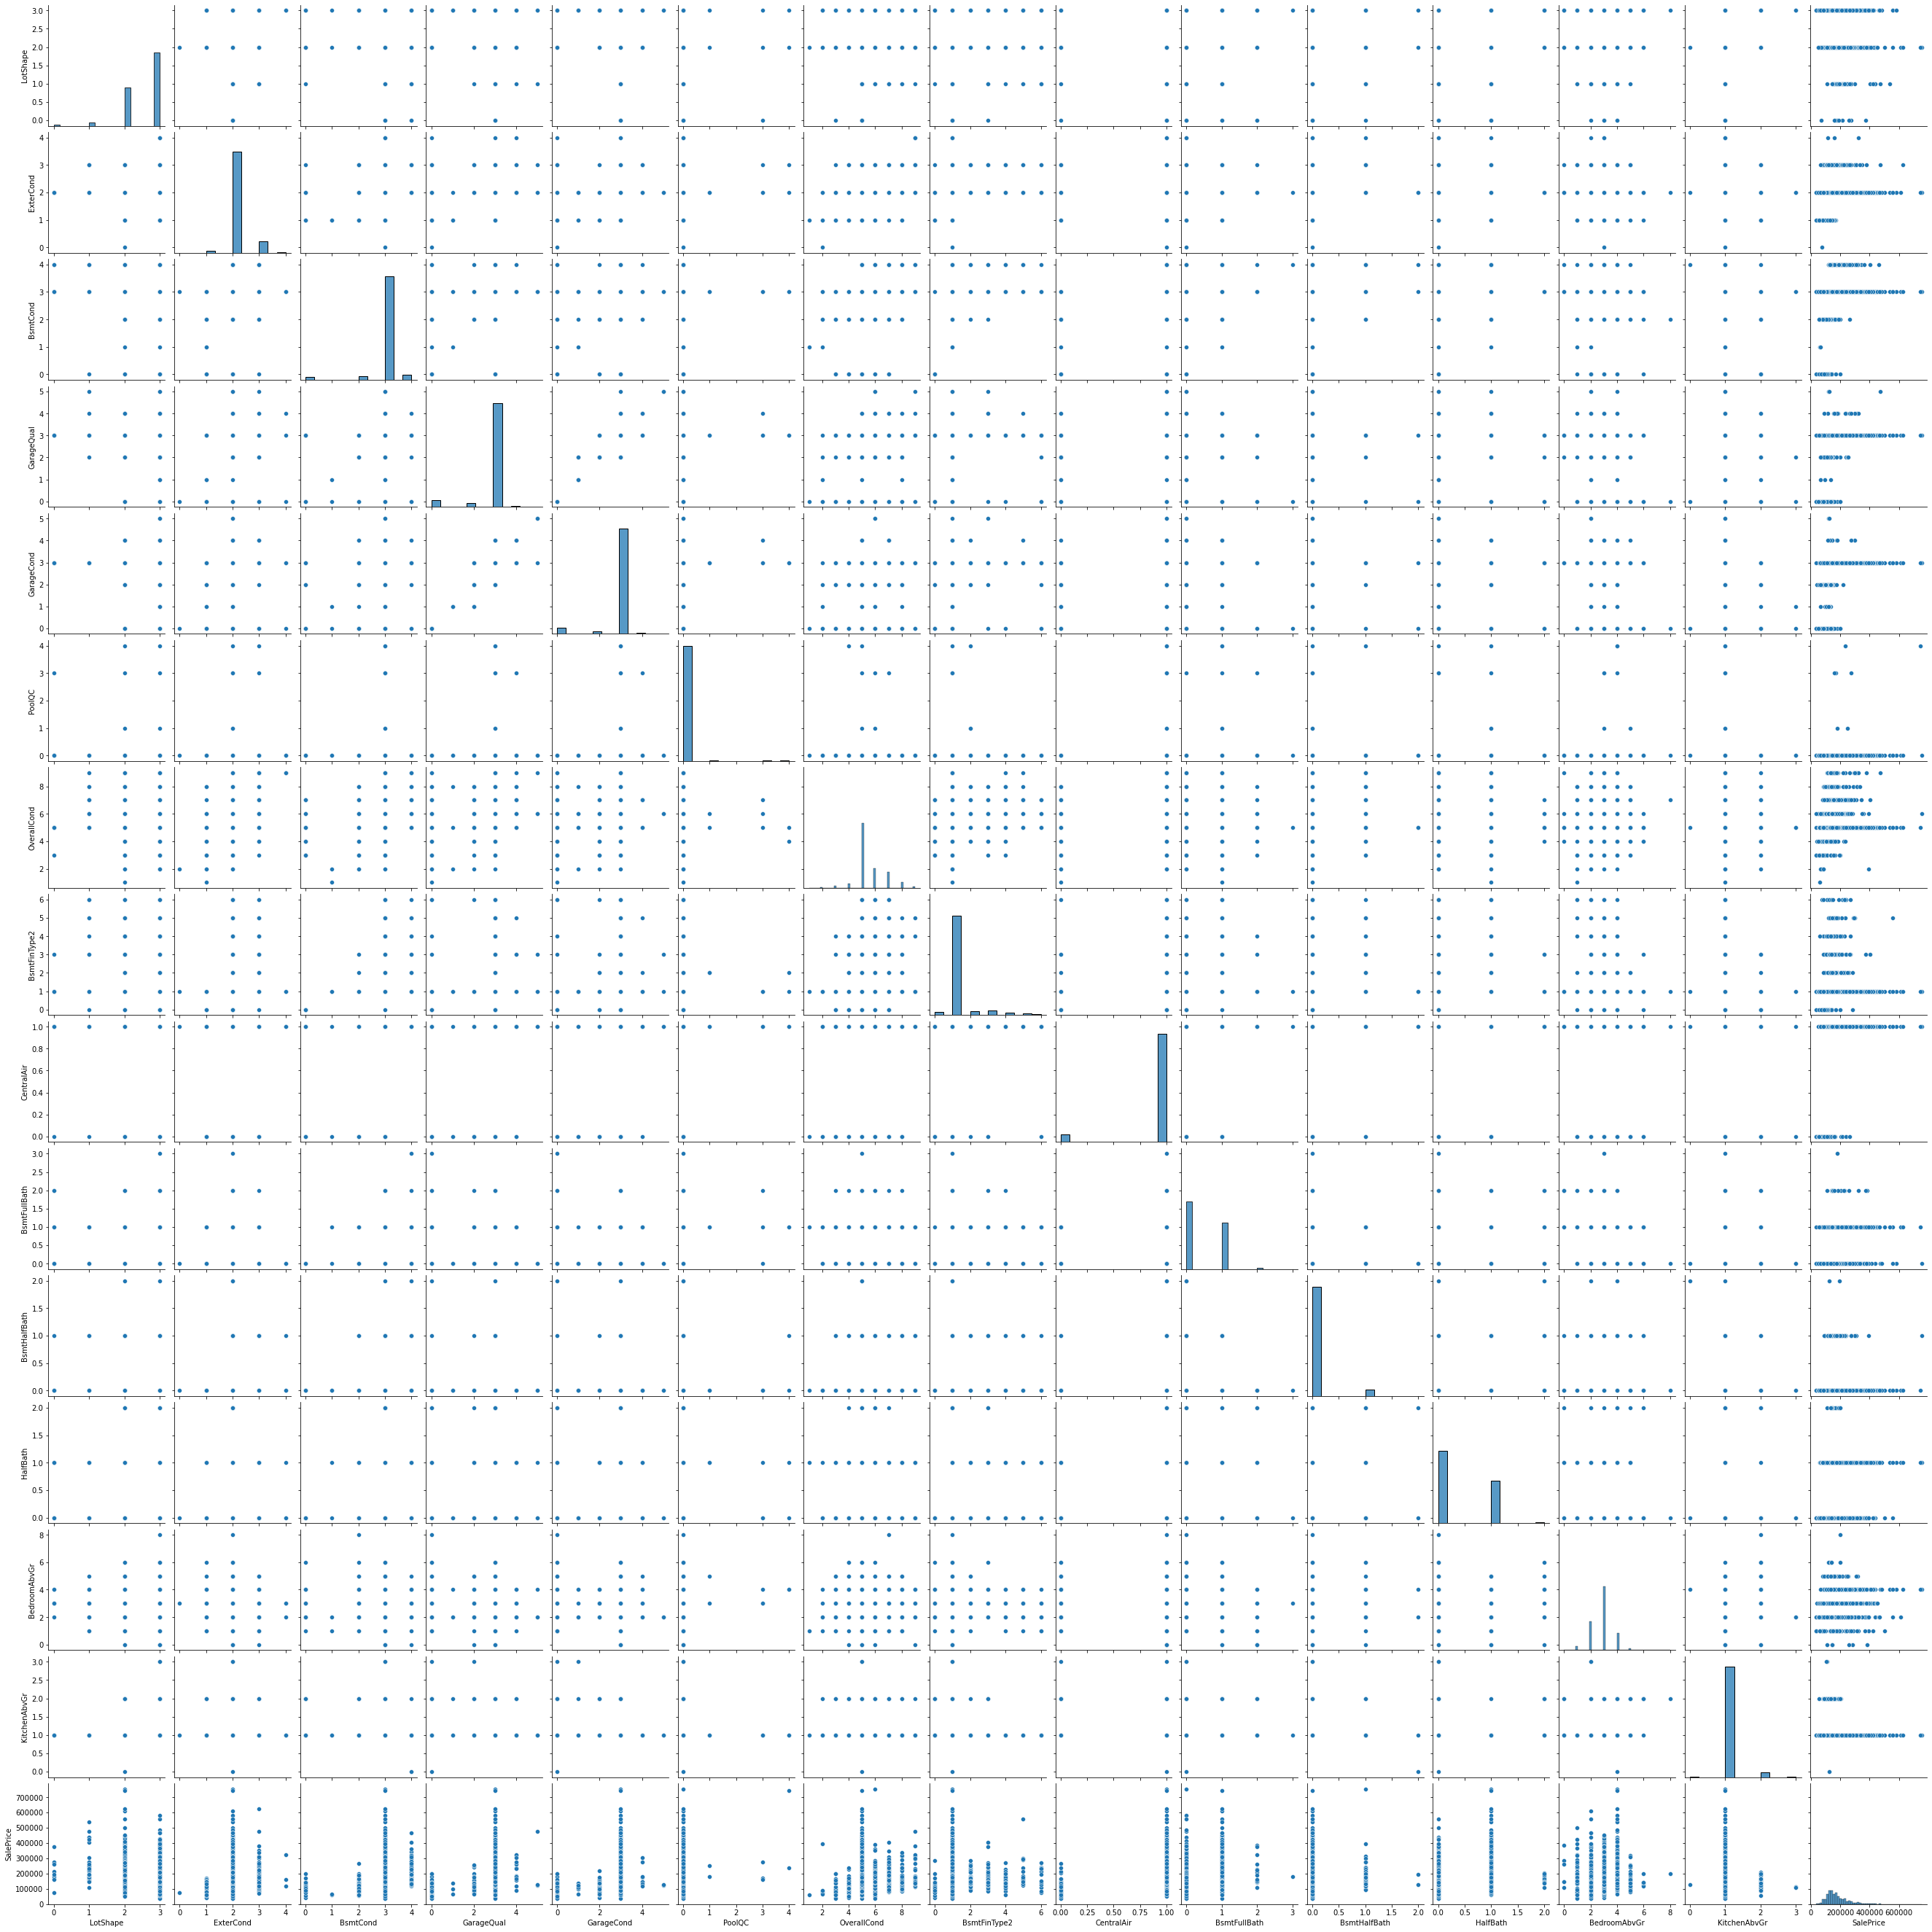

In [69]:
# Do Pair Plot of following Ordered Categorical variables with 'SalePrice' and have low correlation.
list_of_columns = ['LotShape', 'ExterCond', 'BsmtCond',
                   'GarageQual', 'GarageCond', 'PoolQC',
                   'OverallCond', 'BsmtFinType2', 'CentralAir', 'BsmtFullBath',
                   'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation** : Mostly we can not see a linear pattern here - as the quality increases, sales price is not steadily increasing. 'PoolQC' have very low spread and weak correlation with other parameters, so we will drop this column as well.
'GarageQual' and 'GarageCond' have strong correlation with each other, hence we can drop one of them. Since 'GarageQual' have slightly more spread, we will drop 'GarageCond'.

In [70]:
# Remove following columns due to low correlation and less scatter
list_of_columns = ['PoolQC', 'GarageCond', 'BsmtFinType2', 'ExterCond', 'BsmtHalfBath', 'KitchenAbvGr']
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [71]:
# Save unordered categorical features column names
category_columns = hpp_df.select_dtypes(include='category').columns
print('Categorical columns are:\n', category_columns)

Categorical columns are:
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'Fireplaces', 'GarageType', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'Age Bucket'],
      dtype='object')


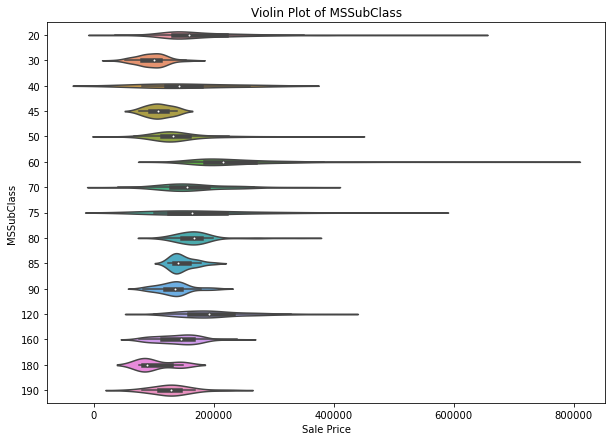

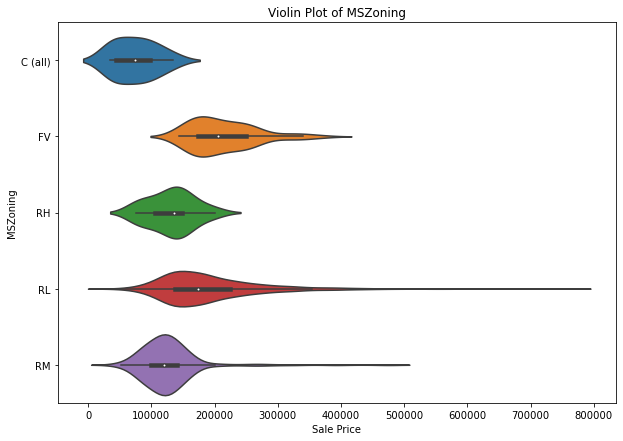

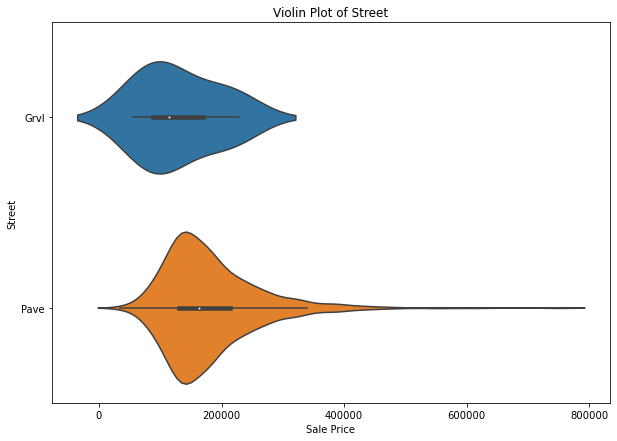

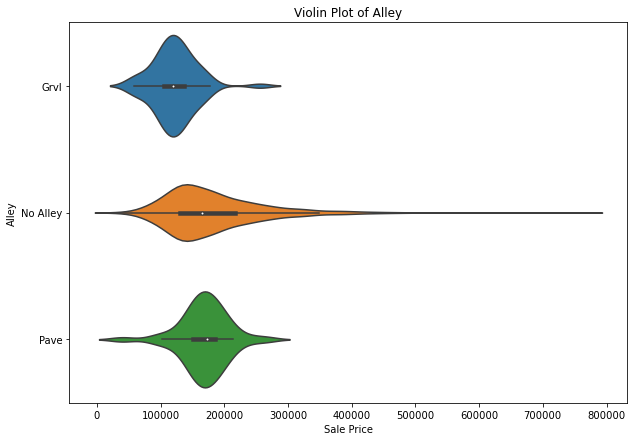

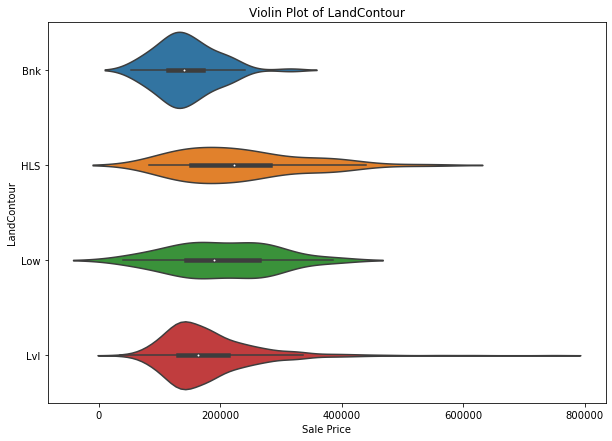

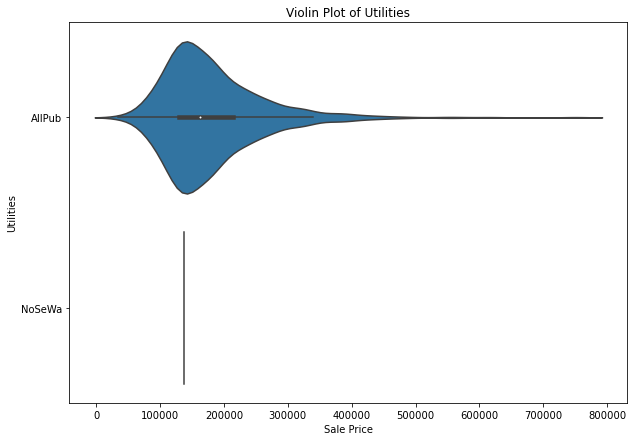

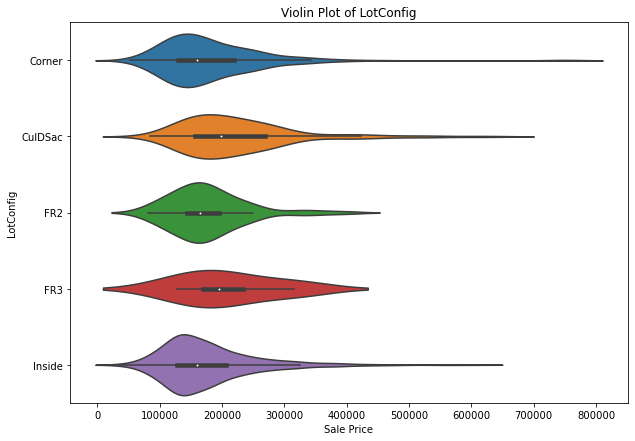

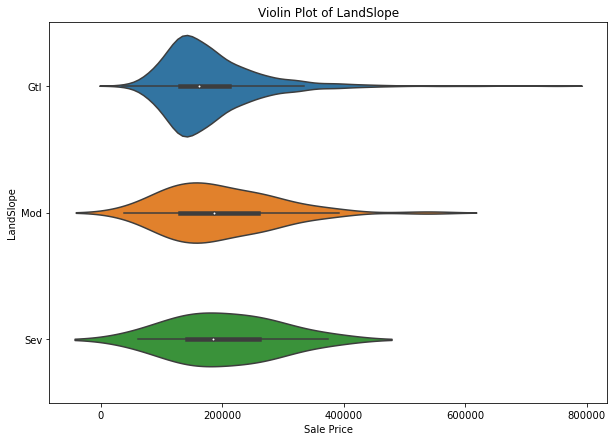

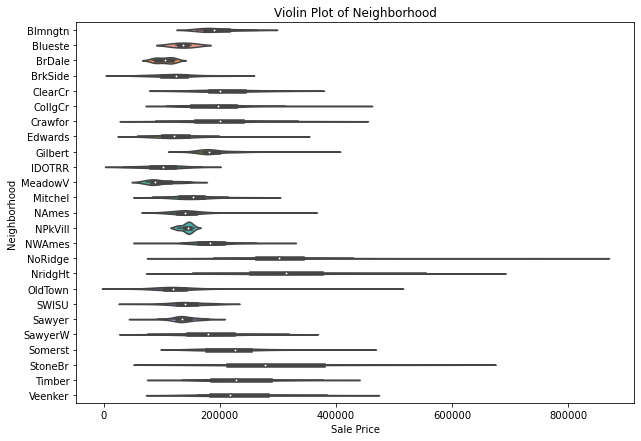

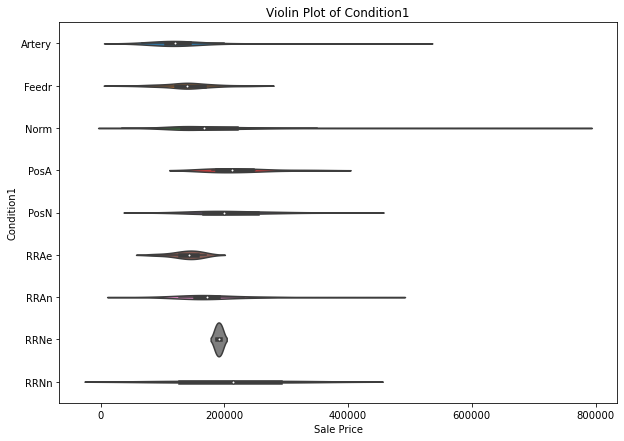

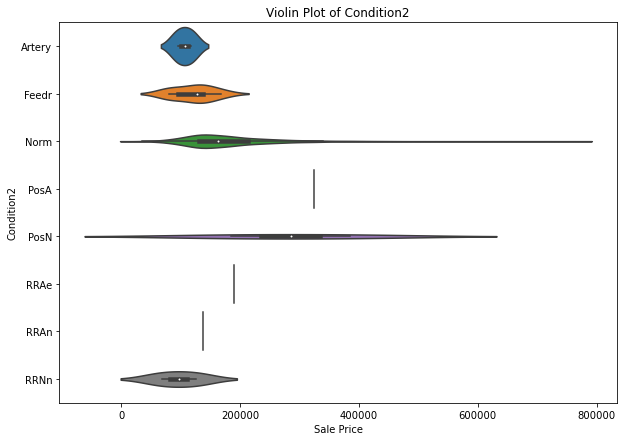

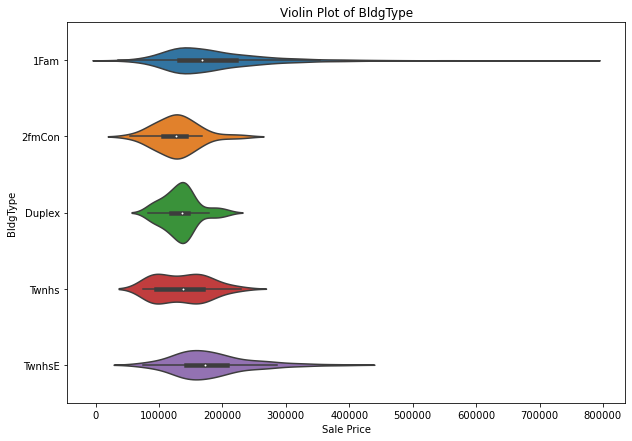

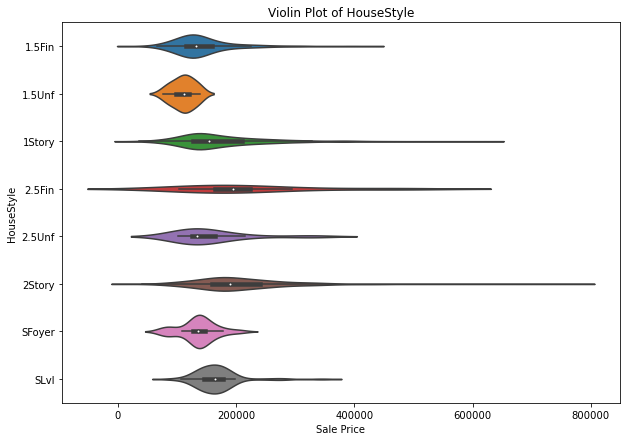

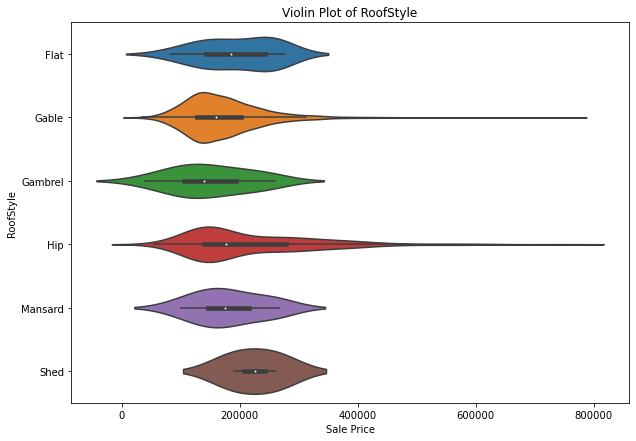

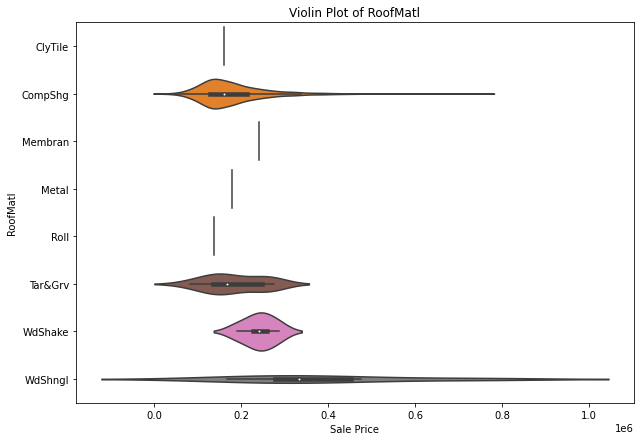

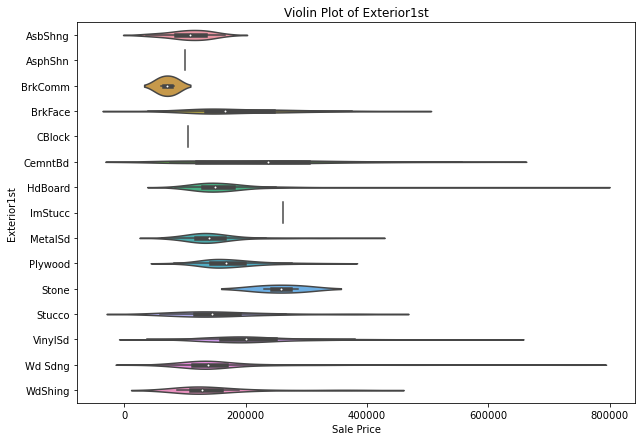

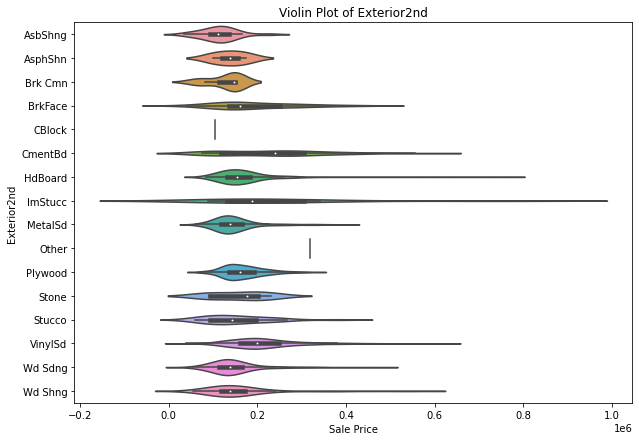

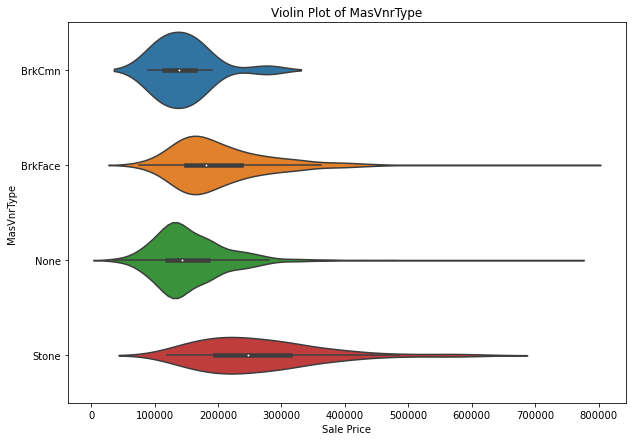

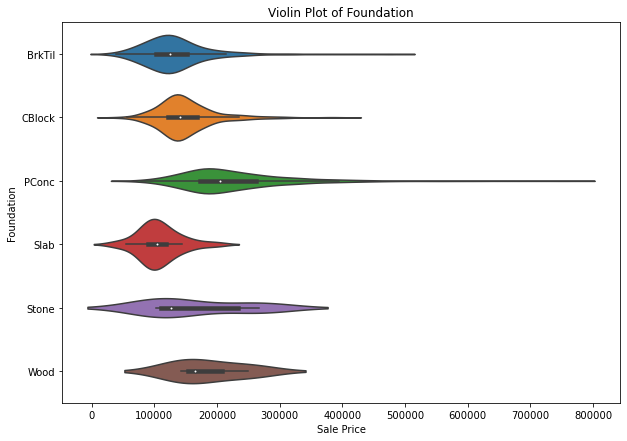

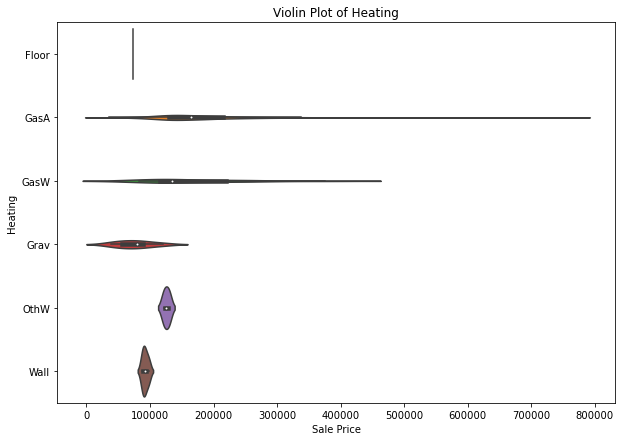

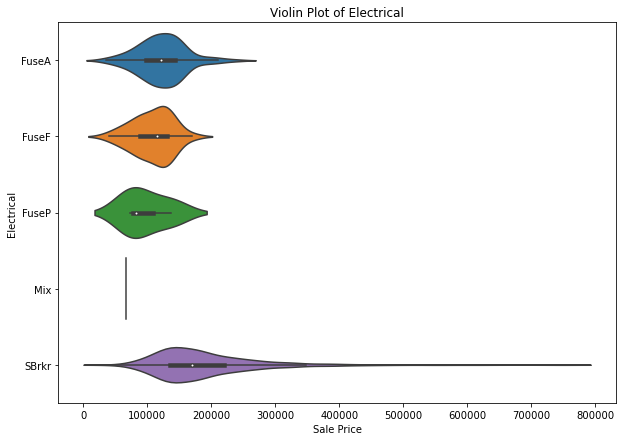

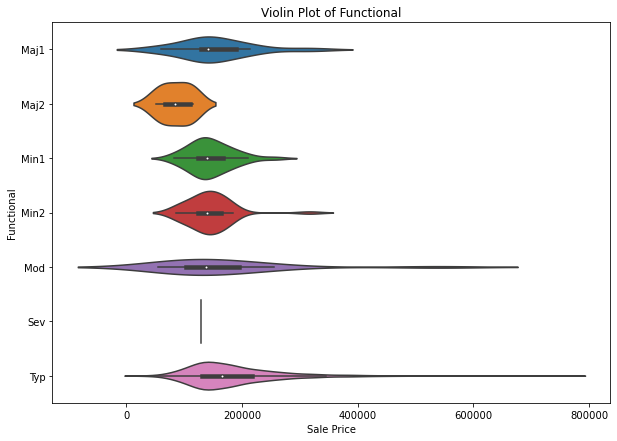

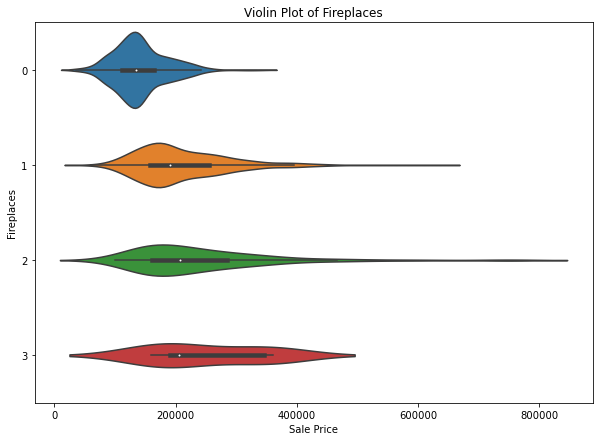

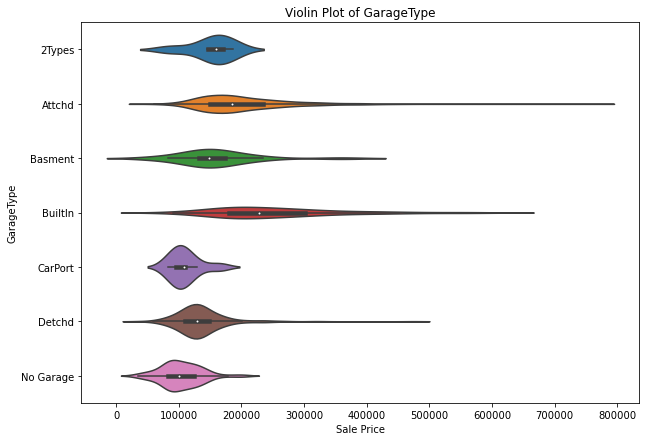

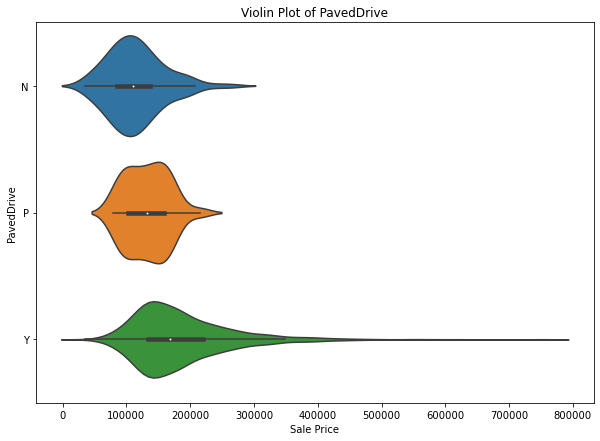

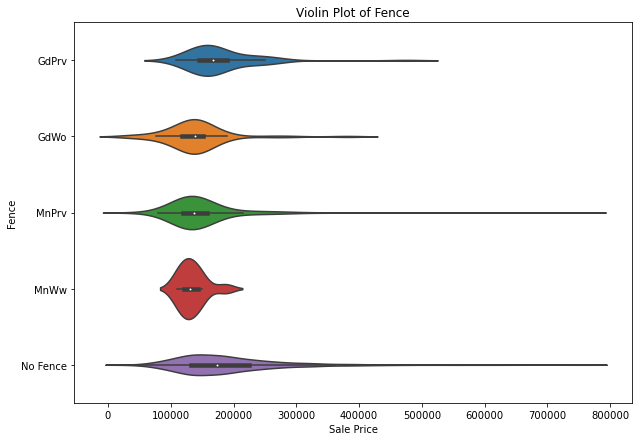

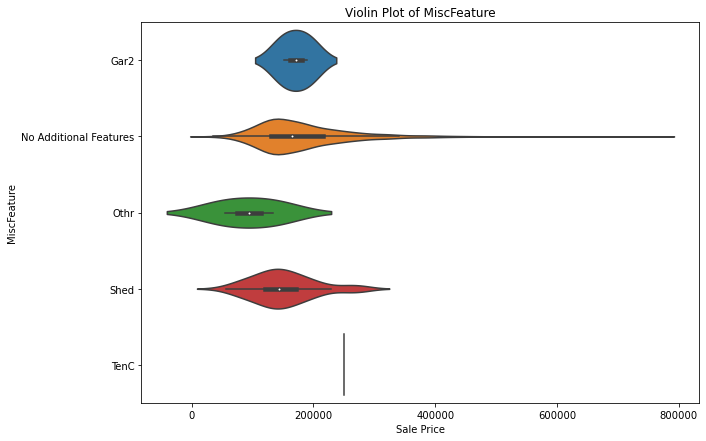

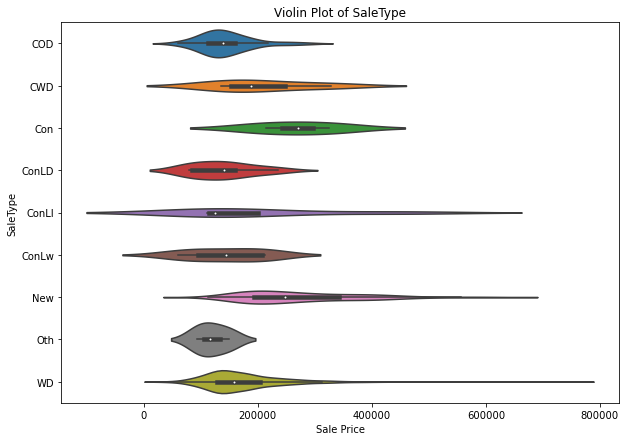

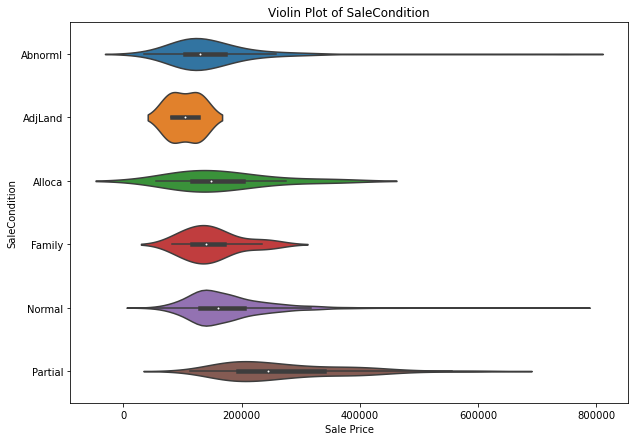

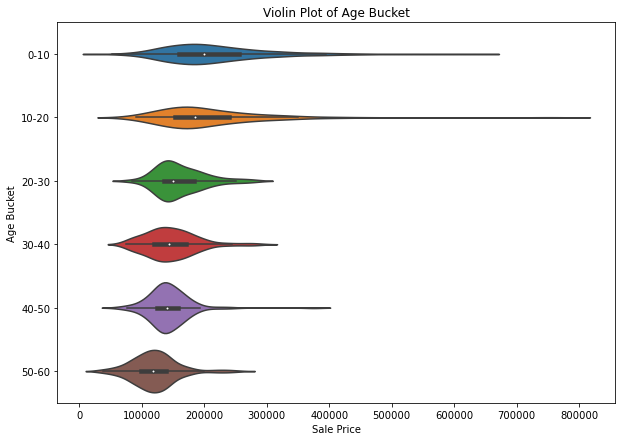

In [72]:
# Plot violin plot for all unordered ategorical features columns
for col in category_columns:
    plt.figure(figsize = (10, 7))
    sns.violinplot(data = hpp_df, y = col, x = 'SalePrice')
    plt.title('Violin Plot of {}'.format(col))
    plt.xlabel('Sale Price')
    plt.show()

**Observation** : We can see how each variable box plot and kernel density varies. Most of the feature levels have lower count and less spread, hence we can remove these unwanted feature sets.

In [73]:
# Create dummy for all categorical variables
# Store it in a new data frame - 'dummy_df'.

dummy_df = pd.get_dummies(hpp_df[category_columns], drop_first = True)

# Check how 'dummy_df' data frame looks like
dummy_df.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No Alley  Alley_Pave  LandContour_HLS  LandContour_Low  \
0               1           0                0                0   
1               1           0                0                0   
2               1           0                0                0   
3               1           0                0                0   
4               1           0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0       

In [74]:
# Check size of dummy dataframe
print('Dummy dataframe have {0} rows and {1} columns'.format(dummy_df.shape[0], dummy_df.shape[1]))

Dummy dataframe have 1460 rows and 182 columns


**Capping** - Let's drop some features with least count, i.e. drop features that have count less than 10% of the total data. This is called capping and doesn't much affect on the prediction as they will directly fall under the category of unimportant variables.

In [75]:
# Get sum of all levels of dummy categorical variables
sum_column = dummy_df.sum(axis=0)

In [76]:
# Drop all dummy categorical variables which have count less than 10% of the total data
percent_to_drop = ((dummy_df.shape[0] * 10) / 100)
for i in range(0, len(sum_column)):
    if sum_column[i] < percent_to_drop:
        print('Dropping dummy column {0} as count is {1} less than 10% of the total data'.format(sum_column.index[i], sum_column[i]))
        dummy_df.drop(labels = sum_column.index[i], axis = 1, inplace = True)

Dropping dummy column MSSubClass_30 as count is 69 less than 10% of the total data
Dropping dummy column MSSubClass_40 as count is 4 less than 10% of the total data
Dropping dummy column MSSubClass_45 as count is 12 less than 10% of the total data
Dropping dummy column MSSubClass_50 as count is 144 less than 10% of the total data
Dropping dummy column MSSubClass_70 as count is 60 less than 10% of the total data
Dropping dummy column MSSubClass_75 as count is 16 less than 10% of the total data
Dropping dummy column MSSubClass_80 as count is 58 less than 10% of the total data
Dropping dummy column MSSubClass_85 as count is 20 less than 10% of the total data
Dropping dummy column MSSubClass_90 as count is 52 less than 10% of the total data
Dropping dummy column MSSubClass_120 as count is 87 less than 10% of the total data
Dropping dummy column MSSubClass_160 as count is 63 less than 10% of the total data
Dropping dummy column MSSubClass_180 as count is 10 less than 10% of the total data
D

In [77]:
# Check size of dummy dataframe
print('Dummy dataframe now have {0} rows and {1} columns'.format(dummy_df.shape[0], dummy_df.shape[1]))

Dummy dataframe now have 1460 rows and 43 columns


In [78]:
# Save column names of dummy
dummy_columns = dummy_df.columns

# Add the dummy dataframe  to the original House Price Predition dataframe
hpp_df = pd.concat([hpp_df, dummy_df], axis = 1)

# Now let's see the first 5 rows of House Price Predition dataframe.
hpp_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  LotShape  \
0         60       RL           65     8450   Pave  No Alley         3   
1         20       RL           80     9600   Pave  No Alley         3   
2         60       RL           68    11250   Pave  No Alley         2   
3         70       RL           60     9550   Pave  No Alley         2   
4         60       RL           84    14260   Pave  No Alley         2   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace         196          3      PConc   
1     MetalSd     MetalSd       None           0          2     CBlock   
2     VinylSd     VinylSd    BrkFace         162          3      PConc   
3     Wd Sdng     Wd Shng       None           0          2     BrkTil   
4     VinylSd     VinylSd    BrkFace         350          3      PConc   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  TotalBsmtSF Heating  \
0         4         3             1             6          856    GasA   
1         4         3             4             5         1262    GasA   
2         4         3             2             6          920    GasA   
3         3         4             1             5          756    GasA   
4         4         3             3             6         1145    GasA   

   HeatingQC  CentralAir Electrical  GrLivArea  BsmtFullBath  FullBath  \
0          4           1      SBrkr       1710             1         2   
1          4           1      SBrkr       1262             0         2   
2          4           1      SBrkr       1786             1         2   
3          3           1      SBrkr       1717             1         1   
4          4           1      SBrkr       2198             1         2   

   HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd Functional Fireplaces  \
0         1             3            3             8        Typ          0   
1         0             3            2             6        Typ          1   
2         1             3            3             6        Typ          1   
3         0             3            3             7        Typ          1   
4         1             4            3             9        Typ          1   

   FireplaceQu GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0            0     Attchd         2003             2           2         548   
1            3     Attchd         1976             2           2         460   
2            3     Attchd         2001             2           2         608   
3            4     Detchd         1998             1           3         642   
4            3     Attchd         2000             2           3         836   

   GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
0           3          Y           0           61              0            0   
1           3          Y         298            0              0            0   
2           3          Y           0           42              0            0   
3           3          Y          

In [79]:
# Drop columns as we have created the dummies for it

# Remove columns
hpp_df.drop(labels = category_columns, axis = 1, inplace = True)

# Now let's see the first 5 rows of House Price Predition dataframe.
hpp_df.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0           65     8450         3            7            5         196   
1           80     9600         3            6            8           0   
2           68    11250         2            7            5         162   
3           60     9550         2            7            5           0   
4           84    14260         2            8            5         350   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  TotalBsmtSF  \
0          3         4         3             1             6          856   
1          2         4         3             4             5         1262   
2          3         4         3             2             6          920   
3          2         3         4             1             5          756   
4          3         4         3             3             6         1145   

   HeatingQC  CentralAir  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          4           1       1710             1         2         1   
1          4           1       1262             0         2         0   
2          4           1       1786             1         2         1   
3          3           1       1717             1         1         0   
4          4           1       2198             1         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  \
0             3            3             8            0         2003   
1             3            2             6            3         1976   
2             3            3             6            3         2001   
3             3            3             7            4         1998   
4             4            3             9            3         2000   

   GarageFinish  GarageCars  GarageArea  GarageQual  WoodDeckSF  OpenPorchSF  \
0             2           2         548           3           0           61   
1             2           2         460           3         298            0   
2             2           2         608           3           0           42   
3             1           3         642           3           0           35   
4             2           3         836           3         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  MSSubClass_60  MSZoning_RL  \
0              0            0     208500              1            1   
1              0            0     181500              0            1   
2              0            0     223500              1            1   
3            272            0     140000              0            1   
4              0            0     250000              1            1   

   MSZoning_RM  Street_Pave  Alley_No Alley  LandContour_Lvl  \
0            0            1               1                1   
1            0            1               1                1   
2            0            1               1                1   
3            0            1               1                1   
4            0            1               1                1   

   LotConfig_Inside  Neighborhood_CollgCr  Neighborhood_NAmes  \
0                 1                     1                   0   
1                 0                     0                   0   
2                 1                     1                   0   
3                 0                     0                   0   
4                 0                     0                   0   

   Condition1_Norm  Condition2_Norm  HouseStyle_1Story  HouseStyle_2Story  \
0                1                1                  0                  1   
1                0                1                  1                  0   
2                1                1                  0                  1   
3                1                1                  0                  1   
4                1                1                  0                  1   

   RoofStyle_Gable  RoofStyle_Hip  RoofMatl_CompShg  Exterior1st

In [80]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(hpp_df.shape[0], hpp_df.shape[1]))

The data set now have 1460 rows and 75 columns


In [81]:
# Log transformation of Target variable - 'SalePrice'
hpp_df['SalePrice (log scale)'] = np.log(hpp_df['SalePrice'])

# Drop 'SalePrice'
hpp_df.drop('SalePrice', axis = 1, inplace = True)

In [82]:
# Check the percentile and min-max of numerical variables.
hpp_df.describe()

LotFrontage      LotArea   LotShape  OverallQual  OverallCond  \
count    1460.0000    1460.0000  1460.0000    1460.0000    1460.0000   
mean       57.6233   10516.8281     2.5918       6.0993       5.5753   
std        34.6643    9981.2649     0.5823       1.3830       1.1128   
min         0.0000    1300.0000     0.0000       1.0000       1.0000   
25%        42.0000    7553.5000     2.0000       5.0000       5.0000   
50%        63.0000    9478.5000     3.0000       6.0000       5.0000   
75%        79.0000   11601.5000     3.0000       7.0000       6.0000   
max       313.0000  215245.0000     3.0000      10.0000       9.0000   

       MasVnrArea  ExterQual   BsmtQual   BsmtCond  BsmtExposure  \
count   1460.0000  1460.0000  1460.0000  1460.0000     1460.0000   
mean     103.1171     2.3959     3.4890     2.9349        1.6301   
std      180.7314     0.5743     0.8765     0.5522        1.0674   
min        0.0000     1.0000     0.0000     0.0000        0.0000   
25%        0.0000     2.0000     3.0000     3.0000        1.0000   
50%        0.0000     2.0000     4.0000     3.0000        1.0000   
75%      164.2500     3.0000     4.0000     3.0000        2.0000   
max     1600.0000     4.0000     5.0000     4.0000        4.0000   

       BsmtFinType1  TotalBsmtSF  HeatingQC  CentralAir  GrLivArea  \
count     1460.0000    1460.0000  1460.0000   1460.0000  1460.0000   
mean         3.5459    1057.4295     3.1452      0.9349  1515.4637   
std          2.1078     438.7053     0.9595      0.2467   525.4804   
min          0.0000       0.0000     0.0000      0.0000   334.0000   
25%          1.0000     795.7500     2.0000      1.0000  1129.5000   
50%          4.0000     991.5000     4.0000      1.0000  1464.0000   
75%          6.0000    1298.2500     4.0000      1.0000  1776.7500   
max          6.0000    6110.0000     4.0000      1.0000  5642.0000   

       BsmtFullBath   FullBath   HalfBath  BedroomAbvGr  KitchenQual  \
count     1460.0000  1460.0000  1460.0000     1460.0000    1460.0000   
mean         0.4253     1.5651     0.3829        2.8664       2.5116   
std          0.5189     0.5509     0.5029        0.8158       0.6638   
min          0.0000     0.0000     0.0000        0.0000       1.0000   
25%          0.0000     1.0000     0.0000        2.0000       2.0000   
50%          0.0000     2.0000     0.0000        3.0000       2.0000   
75%          1.0000     2.0000     1.0000        3.0000       3.0000   
max          3.0000     3.0000     2.0000        8.0000       4.0000   

       TotRmsAbvGrd  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.0000    1460.0000    1460.0000     1460.0000   1460.0000   
mean         6.5178       1.8253    1868.7397        1.7158      1.7671   
std          1.6254       1.8109     453.6973        0.8928      0.7473   
min          2.0000       0.0000       0.0000        0.0000      0.0000   
25%          5.0000       0.0000    1958.0000        1.0000      1.0000   
50%          6.0000       2.0000    1977.0000        2.0000      2.0000   
75%          7.0000       4.0000    2001.0000        2.0000      2.0000   
max         14.0000       5.0000    2010.0000        3.0000      4.0000   

       GarageArea  GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1460.0000   1460.0000   1460.0000    1460.0000      1460.0000   
mean     472.9801      2.8103     94.2445      46.6603        21.9541   
std      213.8048      0.7229    125.3388      66.2560        61.1191   
min        0.0000      0.0000      0.0000       0.0000         0.0000   
25%      334.5000      3.0000      0.0000       0.0000         0.0000   
50%      480.0000      3.0000      0.0000      25.0000         0.0000   
75%      576.0000      3.0000    168.0000      68.0000         0.0000   
max     1418.0000      5.0000    857.0000     547.0000       552.0000   

       ScreenPorch  MSSubClass_60  MSZoning_RL  MSZoning_RM  Street_Pave  \
count    1460.0000      1460.0000    1460.0000    1460.

### Splitting the Data into Training and Testing Sets

In [83]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(hpp_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [84]:
# Check the size of train and test dataframe
print("Train dataframe have {0} Rows and {1} Columns".format(df_train.shape[0], df_train.shape[1]))
print("Test dataframe have {0} Rows and {1} Columns".format(df_test.shape[0], df_test.shape[1]))

Train dataframe have 1021 Rows and 75 Columns
Test dataframe have 438 Rows and 75 Columns


In [85]:
# See first 5 rows of train dataframe
df_train.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
210            67     5604         3            5            6           0   
318            90     9900         3            7            5         256   
239            52     8741         3            6            4           0   
986            59     5310         3            6            8           0   
1416           60    11340         3            4            6           0   

      ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  TotalBsmtSF  \
210           2         3         3             1             3          864   
318           3         4         3             4             6         1347   
239           2         3         2             1             2          735   
986           2         3         2             1             1          485   
1416          2         3         3             1             1          777   

      HeatingQC  CentralAir  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
210           2           0        864             1         1         0   
318           4           1       2646             1         2         1   
239           2           1       1487             0         1         1   
986           3           1       1635             0         1         0   
1416          3           1       2290             0         2         0   

      BedroomAbvGr  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  \
210              2            2             5            0            0   
318              4            3             9            3         1993   
239              3            2             7            4         1949   
986              2            3             5            0         1950   
1416             4            2            11            0         1971   

      GarageFinish  GarageCars  GarageArea  GarageQual  WoodDeckSF  \
210              0           0           0           0           0   
318              2           3         656           3         340   
239              1           1         220           3           0   
986              1           1         255           2         394   
1416             1           2         560           3           0   

      OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_60  MSZoning_RL  \
210             0             96            0              0            1   
318            60            144            0              1            1   
239           140              0            0              0            1   
986             0              0            0              0            0   
1416            0            114            0              0            0   

      MSZoning_RM  Street_Pave  Alley_No Alley  LandContour_Lvl  \
210             0            1               1                1   
318             0            1               1                0   
239             0            1               1                1   
986             1            1               1                1   
1416            1            1               1                1   

      LotConfig_Inside  Neighborhood_CollgCr  Neighborhood_NAmes  \
210                  1                     0                   0   
318                  1                     0                   0   
239                  1                     0                   0   
986                  0                     0                   0   
1416                 1                     0                   0   

      Condition1_Norm  Condition2_Norm  HouseStyle_1Story  HouseStyle_2Story  \
210                 1                1                  1                  0   
318                 1                1                  0                  1   
239                 1                1                  0                  0   
986                 0                1                  0                  0   
1416                1                1              

In [86]:
# Get statistics of train dataframe
df_train.describe()

LotFrontage      LotArea   LotShape  OverallQual  OverallCond  \
count    1021.0000    1021.0000  1021.0000    1021.0000    1021.0000   
mean       57.5828   10485.7375     2.5867       6.0911       5.5818   
std        34.4020   10309.1816     0.5970       1.3998       1.0920   
min         0.0000    1477.0000     0.0000       1.0000       1.0000   
25%        43.0000    7446.0000     2.0000       5.0000       5.0000   
50%        60.0000    9500.0000     3.0000       6.0000       5.0000   
75%        78.0000   11512.0000     3.0000       7.0000       6.0000   
max       313.0000  215245.0000     3.0000      10.0000       9.0000   

       MasVnrArea  ExterQual   BsmtQual   BsmtCond  BsmtExposure  \
count   1021.0000  1021.0000  1021.0000  1021.0000     1021.0000   
mean     104.4897     2.3986     3.4789     2.9285        1.6601   
std      187.3411     0.5712     0.9003     0.5772        1.0905   
min        0.0000     1.0000     0.0000     0.0000        0.0000   
25%        0.0000     2.0000     3.0000     3.0000        1.0000   
50%        0.0000     2.0000     4.0000     3.0000        1.0000   
75%      158.0000     3.0000     4.0000     3.0000        3.0000   
max     1600.0000     4.0000     5.0000     4.0000        4.0000   

       BsmtFinType1  TotalBsmtSF  HeatingQC  CentralAir  GrLivArea  \
count     1021.0000    1021.0000  1021.0000   1021.0000  1021.0000   
mean         3.5906    1061.7502     3.1489      0.9275  1517.0255   
std          2.1137     459.1366     0.9749      0.2594   532.0174   
min          0.0000       0.0000     0.0000      0.0000   438.0000   
25%          1.0000     793.0000     2.0000      1.0000  1134.0000   
50%          4.0000     992.0000     4.0000      1.0000  1466.0000   
75%          6.0000    1314.0000     4.0000      1.0000  1768.0000   
max          6.0000    6110.0000     4.0000      1.0000  5642.0000   

       BsmtFullBath   FullBath   HalfBath  BedroomAbvGr  KitchenQual  \
count     1021.0000  1021.0000  1021.0000     1021.0000    1021.0000   
mean         0.4398     1.5661     0.3761        2.8550       2.5113   
std          0.5254     0.5520     0.5006        0.8204       0.6591   
min          0.0000     0.0000     0.0000        0.0000       1.0000   
25%          0.0000     1.0000     0.0000        2.0000       2.0000   
50%          0.0000     2.0000     0.0000        3.0000       2.0000   
75%          1.0000     2.0000     1.0000        3.0000       3.0000   
max          3.0000     3.0000     2.0000        8.0000       4.0000   

       TotRmsAbvGrd  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.0000    1021.0000    1021.0000     1021.0000   1021.0000   
mean         6.5015       1.7953    1866.3604        1.7111      1.7698   
std          1.6055       1.8263     458.8821        0.8998      0.7481   
min          3.0000       0.0000       0.0000        0.0000      0.0000   
25%          5.0000       0.0000    1958.0000        1.0000      1.0000   
50%          6.0000       2.0000    1978.0000        2.0000      2.0000   
75%          7.0000       4.0000    2001.0000        2.0000      2.0000   
max         14.0000       5.0000    2010.0000        3.0000      4.0000   

       GarageArea  GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1021.0000   1021.0000   1021.0000    1021.0000      1021.0000   
mean     471.5495      2.8041     92.4652      46.9079        23.3359   
std      212.7259      0.7255    124.4827      66.1607        63.2044   
min        0.0000      0.0000      0.0000       0.0000         0.0000   
25%      328.0000      3.0000      0.0000       0.0000         0.0000   
50%      480.0000      3.0000      0.0000      25.0000         0.0000   
75%      576.0000      3.0000    168.0000      70.0000         0.0000   
max     1418.0000      5.0000    857.0000     523.0000       552.0000   

       ScreenPorch  MSSubClass_60  MSZoning_RL  MSZoning_RM  Street_Pave  \
count    1021.0000      1021.0000    1021.0000    1021.

In [87]:
# See first 5 rows of test dataframe
df_test.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
1436           60     9000         3            4            6           0   
57             89    11645         2            7            5           0   
780            63     7875         3            7            5          38   
382            79     9245         2            7            5           0   
1170           76     9880         3            6            6           0   

      ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  TotalBsmtSF  \
1436          2         3         3             1             5          864   
57            3         4         3             1             1          860   
780           2         4         4             1             1         1237   
382           3         4         3             3             1          939   
1170          2         3         3             3             5         1096   

      HeatingQC  CentralAir  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1436          2           1        864             0         1         0   
57            4           1       1720             0         2         1   
780           3           1       1253             0         2         0   
382           4           1       1797             0         2         1   
1170          2           1       1118             1         1         0   

      BedroomAbvGr  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  \
1436             3            2             5            0         1974   
57               3            3             7            0         2004   
780              3            2             6            3         1995   
382              3            3             8            0         2006   
1170             3            2             6            1         1977   

      GarageFinish  GarageCars  GarageArea  GarageQual  WoodDeckSF  \
1436             1           2         528           3           0   
57               2           2         565           3           0   
780              3           2         402           3         220   
382              2           2         639           3         144   
1170             3           1         358           3         203   

      OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_60  MSZoning_RL  \
1436            0              0            0              0            1   
57             70              0            0              1            1   
780            21              0            0              0            1   
382            53              0            0              1            1   
1170            0              0            0              0            1   

      MSZoning_RM  Street_Pave  Alley_No Alley  LandContour_Lvl  \
1436            0            1               1                1   
57              0            1               1                1   
780             0            1               1                1   
382             0            1               1                1   
1170            0            1               1                1   

      LotConfig_Inside  Neighborhood_CollgCr  Neighborhood_NAmes  \
1436                 0                     0                   1   
57                   0                     1                   0   
780                  1                     0                   0   
382                  1                     1                   0   
1170                 1                     0                   0   

      Condition1_Norm  Condition2_Norm  HouseStyle_1Story  HouseStyle_2Story  \
1436                1                1                  1                  0   
57                  1                1                  0                  1   
780                 1                1                  1                  0   
382                 1                1                  0                  1   
1170                1                1              

In [88]:
# Get statistics of test dataframe
df_test.describe()

LotFrontage      LotArea  LotShape  OverallQual  OverallCond  \
count     438.0000     438.0000  438.0000     438.0000     438.0000   
mean       57.6393   10590.6644    2.6050       6.1164       5.5616   
std        35.3086    9194.7256    0.5468       1.3454       1.1618   
min         0.0000    1300.0000    0.0000       1.0000       2.0000   
25%        40.2500    7752.0000    2.0000       5.0000       5.0000   
50%        65.0000    9387.5000    3.0000       6.0000       5.0000   
75%        80.0000   11700.0000    3.0000       7.0000       6.0000   
max       313.0000  159000.0000    3.0000      10.0000       9.0000   

       MasVnrArea  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
count    438.0000   438.0000  438.0000  438.0000      438.0000      438.0000   
mean     100.1530     2.3881    3.5114    2.9498        1.5571        3.4361   
std      164.6125     0.5820    0.8194    0.4899        1.0081        2.0916   
min        0.0000     1.0000    0.0000    0.0000        0.0000        0.0000   
25%        0.0000     2.0000    3.0000    3.0000        1.0000        1.0000   
50%        0.0000     2.0000    4.0000    3.0000        1.0000        4.0000   
75%      174.0000     3.0000    4.0000    3.0000        2.0000        6.0000   
max      921.0000     4.0000    5.0000    4.0000        4.0000        6.0000   

       TotalBsmtSF  HeatingQC  CentralAir  GrLivArea  BsmtFullBath  FullBath  \
count     438.0000   438.0000    438.0000   438.0000      438.0000  438.0000   
mean     1047.2215     3.1347      0.9521  1510.6872        0.3904    1.5616   
std       387.7760     0.9239      0.2139   510.5517        0.5023    0.5493   
min         0.0000     1.0000      0.0000   334.0000        0.0000    0.0000   
25%       813.0000     2.0000      1.0000  1121.2500        0.0000    1.0000   
50%       985.5000     3.0000      1.0000  1456.0000        0.0000    2.0000   
75%      1248.5000     4.0000      1.0000  1795.0000        1.0000    2.0000   
max      2524.0000     4.0000      1.0000  3608.0000        2.0000    3.0000   

       HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  FireplaceQu  \
count  438.0000      438.0000     438.0000      438.0000     438.0000   
mean     0.3973        2.8927       2.5137        6.5525       1.8927   
std      0.5082        0.8061       0.6755        1.6724       1.7757   
min      0.0000        0.0000       1.0000        2.0000       0.0000   
25%      0.0000        2.0000       2.0000        5.0000       0.0000   
50%      0.0000        3.0000       2.0000        6.0000       3.0000   
75%      1.0000        3.0000       3.0000        7.0000       4.0000   
max      2.0000        6.0000       4.0000       12.0000       5.0000   

       GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
count     438.0000      438.0000    438.0000    438.0000    438.0000   
mean     1873.9932        1.7283      1.7603    476.3562      2.8242   
std       442.3358        0.8777      0.7470    216.7462      0.7183   
min         0.0000        0.0000      0.0000      0.0000      0.0000   
25%      1959.0000        1.0000      1.0000    336.0000      3.0000   
50%      1977.0000        2.0000      2.0000    470.5000      3.0000   
75%      2001.0000        2.0000      2.0000    576.0000      3.0000   
max      2009.0000        3.0000      3.0000   1248.0000      5.0000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_60  \
count    438.0000     438.0000       438.0000     438.0000       438.0000   
mean      98.1963      45.8927        18.7831      17.4589         0.2237   
std      127.4403      66.5039        55.9633      65.4249         0.4172   
min        0.0000       0.0000         0.0000       0.0000         0.0000   
25%        0.0000       0.0000         0.0000       0.0000         0.0000   
50%        0.0000      24.0000         0.0000       0.0000         0.0000   
75%      180.0000      65.7500         0.0000       0.0000         0.0000   
ma

Now we have all variables of train data in the range 0 to 1. And also we have scaled test data based on scalar parameters from train data

### Building our model

#### Dividing into X and Y sets for the model building

In [89]:
# Pop 'SalePrice (log scale)' column to get our target variable and store the rest of the variables in another dataframe
y_train = df_train.pop('SalePrice (log scale)')
X_train = df_train

In [90]:
# Pop 'SalePrice (log scale)' column to get our target variable and store the rest of the variables in another dataframe
y_test = df_test.pop('SalePrice (log scale)')
X_test = df_test

#### Rescaling the Features

Some columns have large values, hence we need to rescale the variables so that they have a comparable scale with other variables. We will use Standard Scalar to normalize the scaling.

In [91]:
# Call API
scaler = StandardScaler()

# Apply scaler() to all variables other than dummy variables
list_of_columns = X_train.drop(labels = dummy_columns, axis = 1).columns

# Use fit to learn scaler parameters (max, min) of train dataset and apply it to transform the dataset
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])

# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

#### Applying Linear Regression

Let's now try predicting house sale prices using linear regression.

In [92]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [93]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.558774934064086
[-0.0062858   0.02097257 -0.00313757  0.10064509  0.04035934  0.0084239
  0.00536812  0.02533418 -0.00266961  0.02217575  0.02026692 -0.00727343
  0.01355974  0.01763286  0.09875928  0.02355187  0.02256524  0.01715263
  0.01605047  0.0186681   0.01278672  0.0461336  -0.03605691  0.0139558
  0.04736679  0.0123264   0.02478658  0.01085489  0.00258806  0.00211311
  0.00878255 -0.02087877  0.01508175 -0.07383788  0.16741889  0.01495645
  0.01233834 -0.00787219 -0.02043373 -0.00073442  0.06153547  0.10517951
  0.04671615 -0.02095461 -0.13495814 -0.12992803  0.10924604 -0.02172101
 -0.05434419  0.02135406 -0.05101369  0.01797963  0.07507735  0.01350866
  0.04834543  0.00181789  0.01116691  0.01338307  0.03728007 -0.03631901
 -0.00202367  0.03456812 -0.03403966  0.04795776  0.01285038  0.02737422
  0.03741671  0.03403317  0.03553865 -0.03727891  0.03395402  0.00883047
 -0.02246913 -0.03869642]


In [94]:
# Function to calculate different metrics
def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test):
    # Create an empty list
    metric = []
    
    # R-squared of train and test data
    r2_train = r2_score(y_train, y_pred_train)
    metric.append(r2_train)
    r2_test = r2_score(y_test, y_pred_test)
    metric.append(r2_test)
    print('R2 Score (Train) : {}'.format(r2_train))
    print('R2 Score (Test) : {}'.format(r2_test))

    # Residual Sum of Squares (RSS) of train and test data
    rss_train = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss_test)
    print('RSS (Train) : {}'.format(rss_train))
    print('RSS (Test) : {}'.format(rss_test))

    # Mean Squared Error (MSE) of train and test data
    mse_train = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    metric.append(mse_test)
    print('MSE (Train) : {}'.format(mse_train))
    print('MSE (Test) : {}'.format(mse_test))

    # Root Mean Squared Error (RMSE) of train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print('RMSE (Train) : {}'.format(rmse_train))
    print('RMSE (Test) : {}'.format(rmse_test))
    
    return metric

In [95]:
# Predict SalePrice in train and test dataset for Linear Regression
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Calculate metrics
metric_lr = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8878728893516507
R2 Score (Test) : 0.8829159343032014
RSS (Train) : 17.995531410505833
RSS (Test) : 8.4380813062361
MSE (Train) : 0.01762539805142589
MSE (Test) : 0.01926502581332443
RMSE (Train) : 0.1327606796134529
RMSE (Test) : 0.1387985079650514


In [96]:
# Function to calculate the VIFs for model
def generate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [97]:
# Calculate the VIFs for Linear Regression
generate_vif(X_train)

Features     VIF
34       Street_Pave  168.32
46  RoofMatl_CompShg   91.20
41   Condition2_Norm   83.95
44   RoofStyle_Gable   68.14
59      Heating_GasA   58.88
..               ...     ...
28       OpenPorchSF    1.35
27        WoodDeckSF    1.34
0        LotFrontage    1.34
29     EnclosedPorch    1.27
30       ScreenPorch    1.13

[74 rows x 2 columns]

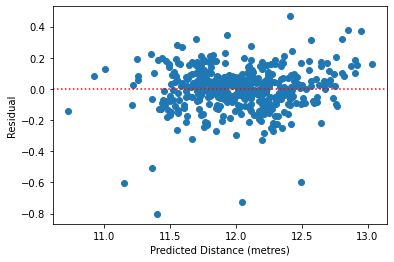

In [98]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis for test data
plt.scatter( y_pred_test , (y_test - y_pred_test))
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

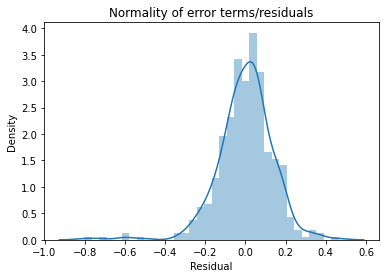

In [99]:
# Distribution of errors
p = sns.distplot((y_test - y_pred_test), kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

**Observation** : Linear Regression is not giving accurate results. VIF shows extreme multicolinearity. Hence we will go for regularization to design our model

### Ridge Regression and Lasso

Let's now try predicting house sale prices for dataset used in simple linear regression, to perform ridge regression and lasso.

### Ridge Regression

In [100]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Call Ridge API
ridge = Ridge()

# Cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 50}
-0.09859406101779686


In [102]:
# Fitting Ridge model for best hyperparameter alpha and printing coefficients which have been penalised
ridge_alpha = ridge_cv.best_params_['alpha']
ridge = Ridge(alpha = ridge_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.0076349   0.01867347 -0.00216345  0.09063804  0.03866372  0.0076322
  0.01223818  0.0245787  -0.00665406  0.0198173   0.02289838  0.01087208
  0.01464873  0.01895264  0.07097813  0.02153963  0.0276281   0.02004564
  0.01648546  0.02318946  0.01972793  0.04026837 -0.01729279  0.01506747
  0.03987772  0.01824027  0.01289204  0.01024895  0.00133431  0.00085887
  0.00898913 -0.0089176   0.02680326 -0.04572004  0.01107699  0.00326903
  0.00602234 -0.00658214 -0.01062412  0.00424701  0.04552461  0.02138103
  0.03013573 -0.01319042 -0.01723755 -0.00419749  0.00615389 -0.00554915
  0.00538986  0.01357972 -0.01183393 -0.00066871  0.00855676  0.01492852
  0.00386782 -0.00081057  0.00625889  0.00021824  0.0232635  -0.01128822
  0.00371843  0.0160409  -0.01491485  0.03143474 -0.00796602  0.01506096
  0.01219321  0.01445732  0.01900889 -0.01734888  0.01715045  0.01098001
 -0.01382368 -0.02449492]


In [103]:
# Convert cross validation results to a dataframe
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.0037    7.3869e-04           0.0015      5.4487e-04      0.0001   
1          0.0030    3.2811e-05           0.0009      1.5565e-04       0.001   
2          0.0026    5.0858e-04           0.0014      4.6377e-04        0.01   
3          0.0026    1.1987e-03           0.0012      4.0002e-04        0.05   
4          0.0029    6.5678e-04           0.0010      8.5052e-05         0.1   
5          0.0026    4.9212e-04           0.0014      4.8741e-04         0.2   
6          0.0026    4.8808e-04           0.0014      4.8949e-04         0.3   
7          0.0038    1.0048e-03           0.0020      1.1259e-03         0.4   
8          0.0027    3.8640e-04           0.0013      4.9058e-04         0.5   
9          0.0030    3.6070e-05           0.0012      4.2735e-04         0.6   
10         0.0036    1.6147e-03           0.0023      1.0845e-03         0.7   
11         0.0038    7.4754e-04           0.0019      6.5454e-04         0.8   
12         0.0022    4.0531e-04           0.0018      1.1667e-03         0.9   
13         0.0052    9.7797e-04           0.0024      7.9978e-04         1.0   
14         0.0042    1.3269e-03           0.0022      4.0011e-04         2.0   
15         0.0027    6.0266e-04           0.0018      4.2994e-04         3.0   
16         0.0046    8.8770e-04           0.0023      5.8634e-04         4.0   
17         0.0040    6.3241e-04           0.0026      8.0006e-04         5.0   
18         0.0026    4.9089e-04           0.0014      4.9049e-04         6.0   
19         0.0024    4.9015e-04           0.0016      4.8986e-04         7.0   
20         0.0032    1.1638e-03           0.0022      7.4902e-04         8.0   
21         0.0045    1.6166e-03           0.0022      4.0000e-04         9.0   
22         0.0028    4.0028e-04           0.0014      4.8994e-04        10.0   
23         0.0026    4.9033e-04           0.0016      4.8980e-04          20   
24         0.0026    4.9051e-04           0.0014      4.9401e-04          50   
25         0.0026    4.9047e-04           0.0014      4.8982e-04         100   
26         0.0024    4.9035e-04           0.0016      4.8967e-04         500   
27         0.0022    4.1127e-04           0.0012      3.6462e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}            -0.1010            -0.1069   
1    {'alpha': 0.001}            -0.1010            -0.1069   
2     {'alpha': 0.01}            -0.1010            -0.1069   
3     {'alpha': 0.05}            -0.1010            -0.1069   
4      {'alpha': 0.1}            -0.1009            -0.1069   
5      {'alpha': 0.2}            -0.1008            -0.1069   
6      {'alpha': 0.3}            -0.1007            -0.1069   
7      {'alpha': 0.4}            -0.1007            -0.1069   
8      {'alpha': 0.5}            -0.1006            -0.1069   
9      {'alpha': 0.6}            -0.1005            -0.1069   
10     {'alpha': 0.7}            -0.1004            -0.1069   
11     {'alpha': 0.8}            -0.1004            -0.1069   
12     {'alpha': 0.9}            -0.1003            -0.1069   
13     {'alpha': 1.0}            -0.1003            -0.1069   
14     {'alpha': 2.0}            -0.0997            -0.1068   
15     {'alpha': 3.0}            -0.0993            -0.1067   
16     {'alpha': 4.0}            -0.0991            -0.1066   
17     {'alpha': 5.0}            -0.0988            -0.1065   
18     {'alpha': 6.0}            -0.0985            -0.1065   
19     {'alpha': 7.0}            -0.0983            -0.1065   
20     {'alpha': 8.0}            -0.0981            -0.1065   
21     {'alpha': 9.0}            -0.0979            -0.1064   
22    {'alpha': 10.0}            -0.0977            -0.1064   
23      {'alpha': 20}            -0.0962            -0.1064   
24      {'alpha': 50}            -0.0943            -0.1066   
25     {'alpha': 100}            -0.0941     

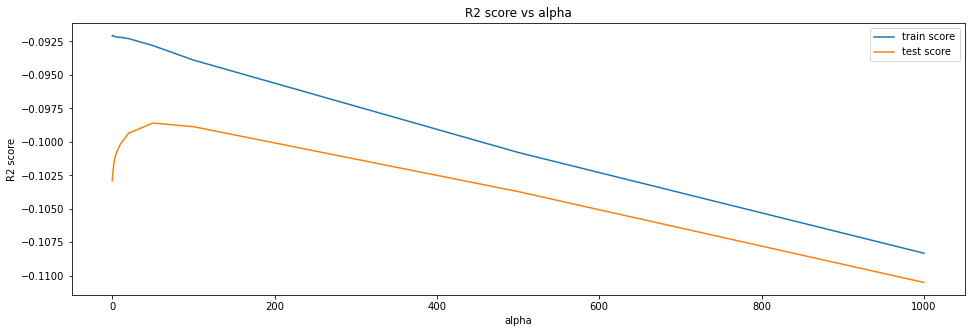

In [104]:
# Plotting mean test and train scores with alpha 
plt.figure(figsize=(16, 5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score vs alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [105]:
# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate metrics
metric_ridge = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8825168521487963
R2 Score (Test) : 0.8826189593557441
RSS (Train) : 18.8551338310309
RSS (Test) : 8.459483866333814
MSE (Train) : 0.01846732010874721
MSE (Test) : 0.019313890105784964
RMSE (Train) : 0.13589451831750687
RMSE (Test) : 0.13897442248768282


### Lasso Regression

In [106]:
# Call Lasso API
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.09902224118146882


In [108]:
# Fitting Lasso model for best hyperparameter alpha and printing coefficients which have been penalised
lasso_alpha = lasso_cv.best_params_['alpha']
lasso = Lasso(alpha = lasso_alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00691324  0.01801062 -0.00154409  0.10056829  0.04129752  0.00384814
  0.00783988  0.02387167 -0.00355204  0.018911    0.02203234  0.00113368
  0.01347146  0.01867317  0.09342755  0.02353503  0.0223151   0.01619129
  0.01515094  0.02191586  0.01214128  0.03943423 -0.01062817  0.01363858
  0.04909691  0.00864931  0.00372992  0.00848516  0.          0.
  0.00802917 -0.          0.00862658 -0.07908866  0.          0.
  0.00167035 -0.00125329 -0.00168019  0.          0.05530141  0.01438381
  0.04367301 -0.01990745 -0.00945687 -0.          0.         -0.
  0.          0.00982606 -0.00575981 -0.          0.01100036  0.01751162
 -0.         -0.          0.          0.          0.02388675 -0.
  0.          0.00867291 -0.01310009  0.03654584 -0.          0.00944513
  0.          0.0070689   0.01344884 -0.01624106  0.01803817  0.00065746
 -0.00775173 -0.02607057]


In [109]:
# Convert cross validation results to a dataframe
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.0062        0.0009           0.0014      3.7833e-04      0.0001   
1          0.0078        0.0026           0.0026      7.9823e-04       0.001   
2          0.0034        0.0005           0.0016      5.1346e-04        0.01   
3          0.0025        0.0004           0.0016      4.8908e-04        0.05   
4          0.0025        0.0004           0.0016      5.2214e-04         0.1   
5          0.0032        0.0010           0.0022      3.9288e-04         0.2   
6          0.0063        0.0008           0.0031      8.2223e-04         0.3   
7          0.0052        0.0012           0.0032      7.4617e-04         0.4   
8          0.0056        0.0008           0.0030      1.2645e-03         0.5   
9          0.0040        0.0015           0.0024      8.0039e-04         0.6   
10         0.0024        0.0008           0.0020      3.6432e-05         0.7   
11         0.0026        0.0005           0.0014      4.7377e-04         0.8   
12         0.0023        0.0004           0.0014      4.8658e-04         0.9   
13         0.0024        0.0005           0.0012      3.8475e-04         1.0   
14         0.0028        0.0004           0.0012      3.9195e-04         2.0   
15         0.0026        0.0005           0.0014      4.9212e-04         3.0   
16         0.0022        0.0004           0.0016      4.9119e-04         4.0   
17         0.0024        0.0005           0.0016      4.9371e-04         5.0   
18         0.0029        0.0006           0.0024      8.0503e-04         6.0   
19         0.0057        0.0010           0.0033      8.6396e-04         7.0   
20         0.0040        0.0017           0.0024      1.0160e-03         8.0   
21         0.0023        0.0005           0.0014      4.6728e-04         9.0   
22         0.0022        0.0004           0.0014      4.8908e-04        10.0   
23         0.0048        0.0012           0.0026      1.0197e-03          20   
24         0.0026        0.0005           0.0014      4.9006e-04          50   
25         0.0032        0.0003           0.0015      1.0451e-03         100   
26         0.0024        0.0005           0.0010      4.1570e-07         500   
27         0.0023        0.0006           0.0013      5.9989e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}            -0.1003            -0.1071   
1    {'alpha': 0.001}            -0.0966            -0.1056   
2     {'alpha': 0.01}            -0.1019            -0.1142   
3     {'alpha': 0.05}            -0.1228            -0.1355   
4      {'alpha': 0.1}            -0.1585            -0.1706   
5      {'alpha': 0.2}            -0.2335            -0.2414   
6      {'alpha': 0.3}            -0.2963            -0.2988   
7      {'alpha': 0.4}            -0.3133            -0.3135   
8      {'alpha': 0.5}            -0.3133            -0.3135   
9      {'alpha': 0.6}            -0.3133            -0.3135   
10     {'alpha': 0.7}            -0.3133            -0.3135   
11     {'alpha': 0.8}            -0.3133            -0.3135   
12     {'alpha': 0.9}            -0.3133            -0.3135   
13     {'alpha': 1.0}            -0.3133            -0.3135   
14     {'alpha': 2.0}            -0.3133            -0.3135   
15     {'alpha': 3.0}            -0.3133            -0.3135   
16     {'alpha': 4.0}            -0.3133            -0.3135   
17     {'alpha': 5.0}            -0.3133            -0.3135   
18     {'alpha': 6.0}            -0.3133            -0.3135   
19     {'alpha': 7.0}            -0.3133            -0.3135   
20     {'alpha': 8.0}            -0.3133            -0.3135   
21     {'alpha': 9.0}            -0.3133            -0.3135   
22    {'alpha': 10.0}            -0.3133            -0.3135   
23      {'alpha': 20}            -0.3133            -0.3135   
24      {'alpha': 50}            -0.3133            -0.3135   
25     {'alpha': 100}            -0.3133     

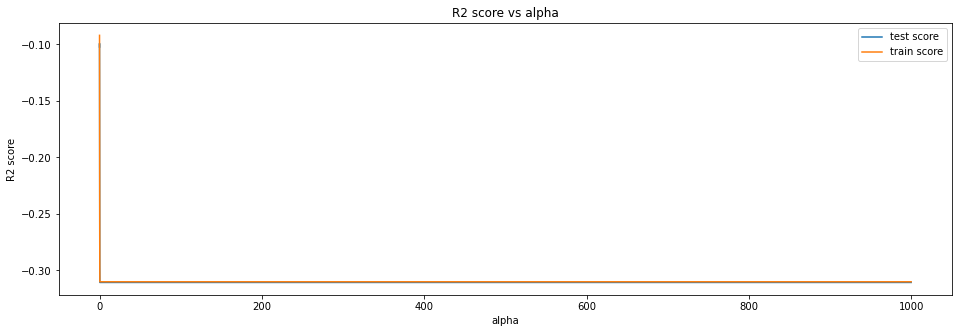

In [110]:
# Plotting mean test and train scores with alpha 
plt.figure(figsize=(16, 5))
plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_test_score"])
plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score vs alpha")
plt.legend(['test score', 'train score'], loc = 'upper right')

In [111]:
# Predict SalePrice in train and test dataset for Lasso Regression
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Calculate metrics
metric_lasso = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8824259775287032
R2 Score (Test) : 0.882097806499956
RSS (Train) : 18.869718502577747
RSS (Test) : 8.497042607943499
MSE (Train) : 0.018481604801741183
MSE (Test) : 0.019399640657405248
RMSE (Train) : 0.13594706617555666
RMSE (Test) : 0.13928259280112948


In [112]:
# Creating a table which contains all the metrics
metric_dict = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Linear Regression' : metric_lr, 
            'Ridge Regression' : metric_ridge,
            'Lasso Regression' : metric_lasso}

metric_df = pd.DataFrame(metric_dict)
metric_df

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)             0.8879            0.8825            0.8824
1   R2 Score (Test)             0.8829            0.8826            0.8821
2       RSS (Train)            17.9955           18.8551           18.8697
3        RSS (Test)             8.4381            8.4595            8.4970
4       MSE (Train)             0.0176            0.0185            0.0185
5        MSE (Test)             0.0193            0.0193            0.0194
6      RMSE (Train)             0.1328            0.1359            0.1359
7       RMSE (Test)             0.1388            0.1390            0.1393

### Lets observe the changes in the coefficients after regularization

In [113]:
# Build a dataframe to store coefficients of various regression
# Create rows = number of final feature list
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [114]:
# Save coefficients
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [115]:
# Display all rows of dataframe
pd.set_option('display.max_rows', None)
betas

Linear   Ridge   Lasso
LotFrontage                        -0.0063 -0.0076 -0.0069
LotArea                             0.0210  0.0187  0.0180
LotShape                           -0.0031 -0.0022 -0.0015
OverallQual                         0.1006  0.0906  0.1006
OverallCond                         0.0404  0.0387  0.0413
MasVnrArea                          0.0084  0.0076  0.0038
ExterQual                           0.0054  0.0122  0.0078
BsmtQual                            0.0253  0.0246  0.0239
BsmtCond                           -0.0027 -0.0067 -0.0036
BsmtExposure                        0.0222  0.0198  0.0189
BsmtFinType1                        0.0203  0.0229  0.0220
TotalBsmtSF                        -0.0073  0.0109  0.0011
HeatingQC                           0.0136  0.0146  0.0135
CentralAir                          0.0176  0.0190  0.0187
GrLivArea                           0.0988  0.0710  0.0934
BsmtFullBath                        0.0236  0.0215  0.0235
FullBath                            0.0226  0.0276  0.0223
HalfBath                            0.0172  0.0200  0.0162
BedroomAbvGr                        0.0161  0.0165  0.0152
KitchenQual                         0.0187  0.0232  0.0219
TotRmsAbvGrd                        0.0128  0.0197  0.0121
FireplaceQu                         0.0461  0.0403  0.0394
GarageYrBlt                        -0.0361 -0.0173 -0.0106
GarageFinish                        0.0140  0.0151  0.0136
GarageCars                          0.0474  0.0399  0.0491
GarageArea                          0.0123  0.0182  0.0086
GarageQual                          0.0248  0.0129  0.0037
WoodDeckSF                          0.0109  0.0102  0.0085
OpenPorchSF                         0.0026  0.0013  0.0000
EnclosedPorch                       0.0021  0.0009  0.0000
ScreenPorch                         0.0088  0.0090  0.0080
MSSubClass_60                      -0.0209 -0.0089 -0.0000
MSZoning_RL                         0.0151  0.0268  0.0086
MSZoning_RM                        -0.0738 -0.0457 -0.0791
Street_Pave                         0.1674  0.0111  0.0000
Alley_No Alley                      0.0150  0.0033  0.0000
LandContour_Lvl                     0.0123  0.0060  0.0017
LotConfig_Inside                   -0.0079 -0.0066 -0.0013
Neighborhood_CollgCr               -0.0204 -0.0106 -0.0017
Neighborhood_NAmes                 -0.0007  0.0042  0.0000
Condition1_Norm                     0.0615  0.0455  0.0553
Condition2_Norm                     0.1052  0.0214  0.0144
HouseStyle_1Story                   0.0467  0.0301  0.0437
HouseStyle_2Story                  -0.0210 -0.0132 -0.0199
RoofStyle_Gable                    -0.1350 -0.0172 -0.0095
RoofStyle_Hip                      -0.1299 -0.0042 -0.0000
RoofMatl_CompShg                    0.1092  0.0062  0.0000
Exterior1st_HdBoard                -0.0217 -0.0055 -0.0000
Exterior1st_MetalSd                -0.0543  0.0054  0.0000
Exterior1st_VinylSd                 0.0214  0.0136  0.0098
Exterior1st_Wd Sdng                -0.0510 -0.0118 -0.0058
Exterior2nd_HdBoard                 0.0180 -0.0007 -0.0000
Exterior2nd_MetalSd                 0.0751  0.0086  0.0110
Exterior2nd_VinylSd                 0.0135  0.0149  0.0175
Exterior2nd_Wd Sdng                 0.0483  0.0039 -0.0000
MasVnrType_BrkFace                  0.0018 -0.0008 -0.0000
MasVnrType_None                     0.0112  0.0063  0.0000
Foundation_CBlock                   0.0134  0.0002  0.0000
Foundation_PConc                    0.0373  0.0233  0.0239
Heating_GasA                       -0.0363 -0.0113 -0.0000
Electrical_SBrkr                   -0.0020  0.0037  0.0000
Functional_Typ                      0.0346  0.0160  0.0087
Fireplaces_1                       -0.0340 -0.0149 -0.0131
GarageType_Attchd                   0.0480  0.0314  0.0365
GarageType_Detchd                   0.0129 -0.0080 -0.0000
PavedDrive_Y                        0.0274  0.0151  0.0094
Fence_MnPrv                         0.0374  0.0122  0.0000
Fence_No Fence          

In [116]:
# The top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False).head(10)

OverallQual          0.0906
GrLivArea            0.0710
Condition1_Norm      0.0455
FireplaceQu          0.0403
GarageCars           0.0399
OverallCond          0.0387
GarageType_Attchd    0.0314
HouseStyle_1Story    0.0301
FullBath             0.0276
MSZoning_RL          0.0268
Name: Ridge, dtype: float64

In [117]:
# The top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False).head(10)

OverallQual          0.1006
GrLivArea            0.0934
Condition1_Norm      0.0553
GarageCars           0.0491
HouseStyle_1Story    0.0437
OverallCond          0.0413
FireplaceQu          0.0394
GarageType_Attchd    0.0365
Foundation_PConc     0.0239
BsmtQual             0.0239
Name: Lasso, dtype: float64

In [118]:
# View the number of features removed by lasso
print('Number of features removed by Lasso : {0}'.format(betas[betas['Lasso'] == 0].shape[0]))

Number of features removed by Lasso : 19


## Assignment Part II - Subjective Questions

### Question 1

#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### What is the optimal value of alpha for ridge and lasso regression?

In [119]:
print('Optimal value of alpha for Ridge Regression is {}'.format(ridge_alpha))
print('Optimal value of alpha for Lasso is {}'.format(lasso_alpha))

Optimal value of alpha for Ridge Regression is 50
Optimal value of alpha for Lasso is 0.001


##### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [120]:
print('New value of alpha for Ridge Regression is {}'.format(ridge_alpha * 2))
print('New value of alpha for Lasso is {}'.format(lasso_alpha * 2))

New value of alpha for Ridge Regression is 100
New value of alpha for Lasso is 0.002


In [121]:
# Let's build the ridge regression model with double value of alpha
ridge_temp = Ridge(alpha = (ridge_alpha * 2))

# Fit the model on training data
ridge_temp.fit(X_train, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = ridge_temp.predict(X_train)
y_pred_test = ridge_temp.predict(X_test)

# Calculate metrics
ridge_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8790252886159265
R2 Score (Test) : 0.879802679284479
RSS (Train) : 19.41550269155196
RSS (Test) : 8.662449146716256
MSE (Train) : 0.019016163263028366
MSE (Test) : 0.019777281156886428
RMSE (Train) : 0.13789910537428576
RMSE (Test) : 0.14063172173050584


In [122]:
# Let's build the Lasso regression model with double value of alpha
lasso_temp = Lasso(alpha = (lasso_alpha * 2))

# Fit the model on training data
lasso_temp.fit(X_train, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = lasso_temp.predict(X_train)
y_pred_test = lasso_temp.predict(X_test)

# Calculate metrics
lasso_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8788652698950874
R2 Score (Test) : 0.8784270443940956
RSS (Train) : 19.44118445486933
RSS (Test) : 8.76158918753795
MSE (Train) : 0.019041316802026767
MSE (Test) : 0.020003628282050115
RMSE (Train) : 0.13799027792575377
RMSE (Test) : 0.1414341835697796


In [123]:
# Creating a table which contains all the metrics
metric_dict_temp = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Ridge Regression' : ridge_metric_temp,
            'Lasso Regression' : lasso_metric_temp}

metric_df_temp = pd.DataFrame(metric_dict_temp)
metric_df_temp

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)            0.8790            0.8789
1   R2 Score (Test)            0.8798            0.8784
2       RSS (Train)           19.4155           19.4412
3        RSS (Test)            8.6624            8.7616
4       MSE (Train)            0.0190            0.0190
5        MSE (Test)            0.0198            0.0200
6      RMSE (Train)            0.1379            0.1380
7       RMSE (Test)            0.1406            0.1414

##### Changes in Ridge Regression metrics:
* R2 score of train set decreased from 0.8825 to 0.8790
* R2 score of test set decreased from 0.8826 to 0.8798

##### Changes in Lasso metrics:
* R2 score of train set decreased from 0.8824 to 0.8789
* R2 score of test set decreased from 0.8821 to 0.8784

##### What will be the most important predictor variables after the change is implemented?

In [124]:
betas_temp = pd.DataFrame(index=X_train.columns)
betas_temp.rows = X_train.columns
betas_temp['Ridge'] = ridge_temp.coef_
betas_temp['Lasso'] = lasso_temp.coef_

In [125]:
# The top 10 coefficients of Ridge regression in descending order
betas_temp['Ridge'].sort_values(ascending=False).head(10)

OverallQual          0.0837
GrLivArea            0.0613
FireplaceQu          0.0377
OverallCond          0.0361
GarageCars           0.0360
Condition1_Norm      0.0350
FullBath             0.0288
GarageType_Attchd    0.0263
MSZoning_RL          0.0255
KitchenQual          0.0254
Name: Ridge, dtype: float64

In [126]:
# The top 10 coefficients of Lasso in descending order
betas_temp['Lasso'].sort_values(ascending=False).head(10)

OverallQual          0.1031
GrLivArea            0.0891
GarageCars           0.0480
Condition1_Norm      0.0472
HouseStyle_1Story    0.0416
OverallCond          0.0387
FireplaceQu          0.0337
GarageType_Attchd    0.0336
KitchenQual          0.0236
BsmtFinType1         0.0232
Name: Lasso, dtype: float64

In [127]:
# View the number of features removed by lasso
print('Number of features removed by Lasso : {0}'.format(betas_temp[betas_temp['Lasso'] == 0].shape[0]))

Number of features removed by Lasso : 32


### Question 2

#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

* It depends on what kind of business problem we are dealing with and use cases.
* If we have a high dimensionality and high correlation in the dataset, then we would want to prefer Lasso regularisation since it penalises less important features more and makes them zero which gives you the benefit of algorithmic feature selection and would make robust predictions.
* Ridge regularisation handles the model complexity by focusing more on the important features which contribute more to the overall error than the less important features.

### Question 3

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [128]:
# The top 5 coefficients of Lasso in descending order, which is not available in incoming data. Hence we have to drop these
# columns and rebuild the Lasso model once more
dropped_columns = betas['Lasso'].sort_values(ascending=False).head(5).index
dropped_columns

Index(['OverallQual', 'GrLivArea', 'Condition1_Norm', 'GarageCars',
       'HouseStyle_1Story'],
      dtype='object')

In [129]:
# The top 5 coefficients of Lasso in descending order
print('The current top 5 predictors are:')
betas['Lasso'].sort_values(ascending=False).head(5)

The current top 5 predictors are:


OverallQual          0.1031
GrLivArea            0.0891
GarageCars           0.0480
Condition1_Norm      0.0472
HouseStyle_1Story    0.0416
Name: Lasso, dtype: float64

In [130]:
# Drop the top 5 coefficients train and test data
X_train_dropped = X_train.drop(dropped_columns, axis = 1)
X_test_dropped = X_test.drop(dropped_columns, axis = 1)

In [131]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_temp = Lasso()

# Cross Validation
lasso_cv_temp = GridSearchCV(estimator = lasso_temp, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            

lasso_cv_temp.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# Printing the best hyperparameter alpha
print(lasso_cv_temp.best_params_)
print(lasso_cv_temp.best_score_)

{'alpha': 0.001}
-0.11375209823075991


In [133]:
# Fitting Lasso model for best hyperparameter alpha
lasso_alpha_temp = lasso_cv_temp.best_params_['alpha']

# Let's build the Lasso regression model with double value of alpha
lasso_temp = Lasso(alpha = lasso_alpha_temp)

# Fit the model on training data
lasso_temp.fit(X_train_dropped, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = lasso_temp.predict(X_train_dropped)
y_pred_test = lasso_temp.predict(X_test_dropped)

# Calculate metrics
lasso_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.8531960567236395
R2 Score (Test) : 0.8522418456326313
RSS (Train) : 23.560894034816123
RSS (Test) : 10.648719044655898
MSE (Train) : 0.023076291904815006
MSE (Test) : 0.024312143937570543
RMSE (Train) : 0.1519088276066108
RMSE (Test) : 0.15592351951380057


In [134]:
# Creating a table which contains all the metrics
metric_dict_temp = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Lasso Regression' : lasso_metric_temp}

metric_df_temp = pd.DataFrame(metric_dict_temp)
metric_df_temp

Metric  Lasso Regression
0  R2 Score (Train)            0.8532
1   R2 Score (Test)            0.8522
2       RSS (Train)           23.5609
3        RSS (Test)           10.6487
4       MSE (Train)            0.0231
5        MSE (Test)            0.0243
6      RMSE (Train)            0.1519
7       RMSE (Test)            0.1559

In [135]:
# Build a dataframe to store coefficients of various regression
# Create rows = number of final feature list
betas_temp = pd.DataFrame(index=X_train_dropped.columns)
betas_temp.rows = X_train_dropped.columns
# Save coefficients
betas_temp['Lasso'] = lasso_temp.coef_

# Display all rows of dataframe
pd.set_option('display.max_rows', None)
betas_temp

Lasso
LotFrontage                        -0.0047
LotArea                             0.0174
LotShape                           -0.0000
OverallCond                         0.0473
MasVnrArea                          0.0142
ExterQual                           0.0312
BsmtQual                            0.0426
BsmtCond                           -0.0143
BsmtExposure                        0.0238
BsmtFinType1                        0.0204
TotalBsmtSF                         0.0416
HeatingQC                           0.0094
CentralAir                          0.0188
BsmtFullBath                        0.0165
FullBath                            0.0546
HalfBath                            0.0348
BedroomAbvGr                        0.0106
KitchenQual                         0.0387
TotRmsAbvGrd                        0.0522
FireplaceQu                         0.0738
GarageYrBlt                        -0.0180
GarageFinish                        0.0185
GarageArea                          0.0560
GarageQual                          0.0189
WoodDeckSF                          0.0095
OpenPorchSF                         0.0000
EnclosedPorch                       0.0039
ScreenPorch                         0.0074
MSSubClass_60                      -0.0000
MSZoning_RL                         0.0000
MSZoning_RM                        -0.0735
Street_Pave                         0.0000
Alley_No Alley                     -0.0000
LandContour_Lvl                    -0.0000
LotConfig_Inside                   -0.0045
Neighborhood_CollgCr               -0.0082
Neighborhood_NAmes                  0.0000
Condition2_Norm                     0.0485
HouseStyle_2Story                   0.0000
RoofStyle_Gable                    -0.0353
RoofStyle_Hip                      -0.0000
RoofMatl_CompShg                   -0.0000
Exterior1st_HdBoard                -0.0000
Exterior1st_MetalSd                 0.0000
Exterior1st_VinylSd                 0.0000
Exterior1st_Wd Sdng                -0.0000
Exterior2nd_HdBoard                -0.0000
Exterior2nd_MetalSd                 0.0003
Exterior2nd_VinylSd                 0.0205
Exterior2nd_Wd Sdng                -0.0000
MasVnrType_BrkFace                 -0.0000
MasVnrType_None                     0.0000
Foundation_CBlock                  -0.0266
Foundation_PConc                    0.0285
Heating_GasA                       -0.0000
Electrical_SBrkr                    0.0000
Functional_Typ                      0.0225
Fireplaces_1                       -0.0443
GarageType_Attchd                   0.0473
GarageType_Detchd                  -0.0000
PavedDrive_Y                        0.0197
Fence_MnPrv                         0.0000
Fence_No Fence                      0.0045
MiscFeature_No Additional Features  0.0236
SaleType_WD                        -0.0048
SaleCondition_Normal                0.0113
Age Bucket_10-20                    0.0208
Age Bucket_30-40                   -0.0152
Age Bucket_50-60                   -0.0343

In [136]:
# The new top 5 coefficients of Lasso in descending order
print('The new top 5 predictors are:')
betas_temp['Lasso'].sort_values(ascending=False).head(5)

The new top 5 predictors are:


FireplaceQu        0.0738
GarageArea         0.0560
FullBath           0.0546
TotRmsAbvGrd       0.0522
Condition2_Norm    0.0485
Name: Lasso, dtype: float64

### Question 4

#### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

##### How can you make sure that a model is robust and generalisable?
* A model should not be impacted by outliers in the training data. In simple terms, model performance should remain same even when variation happens in data set.
* A model should be able to predict when new, previously unseen data, drawn from the same distribution as the one used to create the model is provided.
* A model should not overfit on training data, which can affect accuracy in predicting unseen data
* A model should not underfit as well, which fails to identify any relationship between target and predictor variables

In general, model should not be too complex. It should try to bring the variance to constant level by lightly adjusting bias.

##### What are the implications of the same for the accuracy of the model and why?

* We decrease variance which will lead to some bias, to make a robust and generalized model. Adding bias will decrease the accuracy of the model.
* Regularization helps in finding an optimal solution between accuracy and robutness to build a better model.